# 1. Importación de librerias y carga de datos

In [1]:

!pip install kneed

In [2]:

#Librerias generales
import pandas as pd
import numpy as np
from random import sample
from numpy.random import uniform
%matplotlib inline

#sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import AgglomerativeClustering, KMeans, DBSCAN
from sklearn.metrics import davies_bouldin_score, silhouette_score
from sklearn.metrics.cluster import adjusted_rand_score

#Visualizacion
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px

#Otros
import scipy.cluster.hierarchy as shc
from yellowbrick.cluster import silhouette_visualizer
from kneed import KneeLocator
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('GM_players_statistics.csv')

# 2.Comprensión de datos

Este dataset está tomado de Kaggle.com  y nos ofrece información sobre 1508 usuarios en una plataforma de ajedrez online. He aquí parte de la introducción que encontramos en la página:

"El conjunto de datos contiene estadísticas detalladas de todos los jugadores con el título de Gran Maestro (GM) en chess.com."

"El conjunto de datos está ordenado según la calificación FIDE de los jugadores con título de Gran Maestro (GM) en chess.com. Sin embargo, es posible que el conjunto de datos no refleje una precisión del 100%. Por ejemplo, al revisar el conjunto de datos, noté que Vojtěch Plát tiene una calificación FIDE de 2950.0, lo cual no es correcto. No obstante, al visitar su página de perfil, la calificación FIDE que se muestra allí es, de hecho, 2950. No estoy seguro si hay un error técnico involucrado o si me he perdido algo."

"Según el personal de chess.com, citamos: "No obtenemos la calificación FIDE de forma automática en los perfiles de los usuarios; los usuarios pueden agregar su calificación manualmente si lo desean". Por lo tanto, la calificación FIDE en el conjunto de datos puede no ser completamente precisa."


In [4]:
df.shape

(1508, 35)

In [5]:
df.head(10)

,Unnamed: 0,name,username,profile,user_id,title,fide,country,followers,joined,...,highest_bullet_date,bullet_win,bullet_draw,bullet_loss,highest_tactics_rating,highest_tactics_date,highest_puzzle_rush_score,is_streamer,status,league
0,0,Komodo Engine,komodochess,https://www.chess.com/member/KomodoChess,24944922,GM,3411.0,United States,494,07/11/2015,...,NaN,NaN,NaN,NaN,400,07/11/2015,NaN,False,premium,NaN
1,1,Vojtěch Plát,vojtechplat,https://www.chess.com/member/VojtechPlat,37712368,GM,2950.0,Czech Republic,360,11/08/2017,...,27/09/2021,32.0,8.0,47.0,3251,15/09/2021,49.0,False,premium,Bronze
2,2,PlayMagnus Carlsen,playmagnus,https://www.chess.com/member/PlayMagnus,19578862,GM,2882.0,Norway,199,05/11/2014,...,NaN,NaN,NaN,NaN,400,05/11/2014,NaN,False,premium,NaN
3,3,Magnus Carlsen,magnuscarlsen,https://www.chess.com/member/MagnusCarlsen,3889224,GM,2882.0,Norway,142482,27/08/2010,...,28/03/2023,662.0,98.0,246.0,400,27/08/2010,NaN,False,premium,Elite
4,4,Fabiano Caruana,fabianocaruana,https://www.chess.com/member/FabianoCaruana,11177810,GM,2835.0,United States,14445,17/03/2013,...,30/11/2021,713.0,65.0,203.0,3519,14/06/2023,64.0,False,premium,Crystal
5,5,Iuri Shkuro,iuri_shkuro,https://www.chess.com/member/Iuri_Shkuro,19134490,GM,2828.0,Ukraine,388,02/10/2014,...,10/02/2023,390.0,36.0,192.0,2885,04/03/2023,60.0,False,premium,Silver
6,6,Hikaru Nakamura,hikaru,https://www.chess.com/member/Hikaru,15448422,GM,2814.0,United States,1163963,07/01/2014,...,12/11/2020,10920.0,659.0,1536.0,3427,02/11/2022,123.0,True,premium,Legend
7,7,Garry Kasparov,garrykasparov,https://www.chess.com/member/GarryKasparov,1647937,GM,2812.0,Russia,5672,11/12/2008,...,NaN,NaN,NaN,NaN,400,11/12/2008,NaN,False,premium,NaN
8,8,Viswanathan Anand,anand,https://www.chess.com/member/Anand,8441420,GM,2800.0,India,4092,05/08/2012,...,NaN,NaN,NaN,NaN,400,05/08/2012,NaN,False,premium,NaN
9,9,Levon Aronian,levonaronian,https://www.chess.com/member/LevonAronian,26897402,GM,2790.0,United States,5312,24/02/2016,...,12/11/2020,64.0,30.0,89.0,400,24/02/2016,NaN,False,premium,Silver


Veamos las variables involucradas:

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1508 entries, 0 to 1507
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 1508 non-null   int64  
 1   name                       1241 non-null   object 
 2   username                   1508 non-null   object 
 3   profile                    1508 non-null   object 
 4   user_id                    1508 non-null   int64  
 5   title                      1508 non-null   object 
 6   fide                       913 non-null    float64
 7   country                    1508 non-null   object 
 8   followers                  1508 non-null   int64  
 9   joined                     1508 non-null   object 
 10  last_online                1508 non-null   object 
 11  current_rapid_rating       1055 non-null   float64
 12  highest_rapid_rating       997 non-null    float64
 13  highest_rapid_date         997 non-null    objec

# 3.Preparación de datos


In [7]:
df1 = df.copy()

Para comenzar: ![estadistico_de_hopkins.png](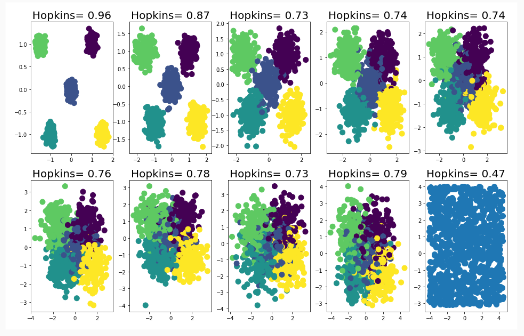![estadistico_de_hopkins.tiff](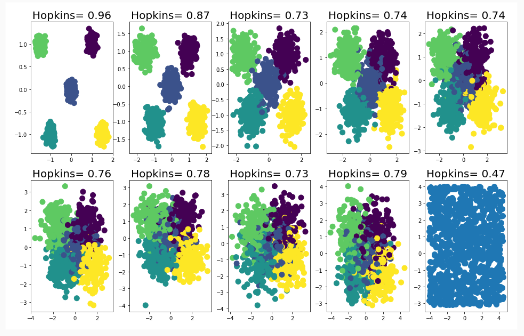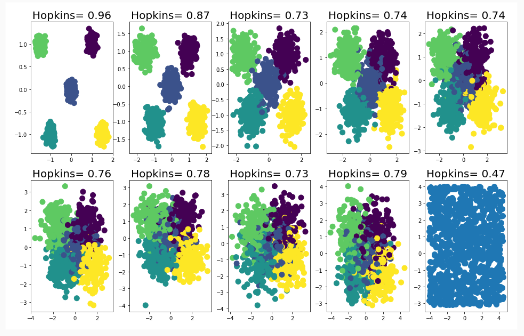))¿Existen filas duplicadas?

In [8]:
total_duplicados = df1.duplicated().sum()
total_duplicados

0

### Datos faltantes

¿Tenemos datos faltantes?

In [9]:
df1.isna().sum()

Unnamed: 0                     0
name                         267
username                       0
profile                        0
user_id                        0
title                          0
fide                         595
country                        0
followers                      0
joined                         0
last_online                    0
current_rapid_rating         453
highest_rapid_rating         511
highest_rapid_date           511
rapid_win                    453
rapid_draw                   453
rapid_loss                   453
current_blitz_rating         120
highest_blitz_rating         126
highest_blitz_date           126
blitz_win                    120
blitz_draw                   120
blitz_loss                   120
current_bullet_rating        335
highest_bullet_rating        364
highest_bullet_date          364
bullet_win                   335
bullet_draw                  335
bullet_loss                  335
highest_tactics_rating         0
highest_ta

Observamos muchas columnas con una gran cantidad de datos faltantes.

Para empezar, eliminaremos las columnas irrelevantes:

In [10]:
df1 = df1.drop(columns=['Unnamed: 0','profile','user_id'])

Eliminamos columnas con demasiados datos faltantes:

In [11]:
df1 = df1.drop(columns=['league', 'highest_puzzle_rush_score'])

Eliminamos filas con NaN en la columna 'name'

In [12]:
# Eliminar filas con NaN en la columna 'name'
df1 = df1.dropna(subset=['name'])
df1 = df1.dropna(subset=['fide'])


### Imputación de datos faltantes:

Completaremos los datos faltantes con los promedios y modas, segun corresponda:

In [13]:

df1['current_rapid_rating'].fillna(df1['current_rapid_rating'].mean(), inplace=True)
df1['highest_rapid_rating'].fillna(df1['highest_rapid_rating'].mean(), inplace=True)
df1['highest_rapid_date'].fillna(df1['highest_rapid_date'].mode(), inplace=True)
df1['rapid_win'].fillna(df1['rapid_win'].mean(), inplace=True)
df1['rapid_draw'].fillna(df1['rapid_draw'].mean(), inplace=True)
df1['rapid_loss'].fillna(df1['rapid_loss'].mean(), inplace=True)
df1['current_blitz_rating'].fillna(df1['current_blitz_rating'].mean(), inplace=True)
df1['highest_blitz_rating'].fillna(df1['highest_blitz_rating'].mean(), inplace=True)
df1['blitz_win'].fillna(df1['blitz_win'].mean(), inplace=True)
df1['blitz_draw'].fillna(df1['blitz_draw'].mean(), inplace=True)
df1['blitz_loss'].fillna(df1['blitz_loss'].mean(), inplace=True)
df1['current_bullet_rating'].fillna(df1['current_bullet_rating'].mean(), inplace=True)
df1['highest_bullet_rating'].fillna(df1['highest_bullet_rating'].mean(), inplace=True)
df1['highest_bullet_date'].fillna(df1['highest_bullet_date'].mode(), inplace=True)
df1['bullet_win'].fillna(df1['bullet_win'].mean(), inplace=True)
df1['bullet_draw'].fillna(df1['bullet_draw'].mean(), inplace=True)
df1['bullet_loss'].fillna(df1['bullet_loss'].mean(), inplace=True)

In [14]:
#transformamos los tipos de datos de las columnas que lo requieran:
df1['fide'] = df1['fide'].astype("int")
df1['followers'] = df1['followers'].astype("int")
df1['current_rapid_rating'] = df1['current_rapid_rating'].astype("int")

# Análisis estadístico

Al aplicar métodos estadísticos, podemos identificar patrones, tendencias y relaciones en conjuntos de información, proporcionando una base objetiva para la toma de decisiones. Esto nos ayuda a comprender la variabilidad de los datos, realizar inferencias sobre poblaciones más amplias y tomar decisiones fundamentadas.

### Distribución y medidas de tendencia central

Creamos un df con algunas columnas de interés para el análisis estadístico:

In [27]:
dfStatics = df1[['username','name','fide','current_rapid_rating','current_blitz_rating', 'current_bullet_rating', 'followers']]
dfStatics.describe()

,fide,current_rapid_rating,current_blitz_rating,current_bullet_rating,followers
count,805.000000,805.000000,805.000000,805.000000,8.050000e+02
mean,2197.124224,2390.284472,2697.616963,2648.433281,2.424347e+03
std,902.085090,280.977412,223.710936,263.627348,4.139797e+04
min,0.000000,263.000000,1200.000000,1079.000000,0.000000e+00
25%,2465.000000,2372.000000,2610.000000,2568.000000,3.300000e+01
50%,2531.000000,2390.000000,2703.000000,2648.433281,1.370000e+02
75%,2603.000000,2539.000000,2840.000000,2797.000000,4.820000e+02
max,3411.000000,2948.000000,3287.000000,3326.000000,1.163963e+06


Observamos que en las tres variables relacionadas con los ratings que proporciona la plataforma hallamos una coincidencia entre la media y la mediana. Sin embargo en la variable ['fide'] no hallamos esta correspondencia (esto puede deberse a lo subrayado en la introducción: los datos en la columna mentada no son del todo fiables).
Dicho esto, en las columnas ['fide'] y ['current_rapid_rating'] hallamos una desviación estandar mucho mayor que en el resto de las columnas.

### Boxplot

Pero aún más informativo puede ser el famoso Boxplot. Este gráfico proporciona una visualización rápida de la dispersión, simetría y presencia de valores atípicos en un conjunto de datos. Consiste en una caja que abarca el rango intercuartílico (IQR), que va desde el primer cuartil (Q1) al tercer cuartil (Q3). Dentro de la caja se encuentra la mediana. Los "bigotes" se extienden desde la caja hasta los valores extremos, excluyendo outliers que se muestran como puntos individuales

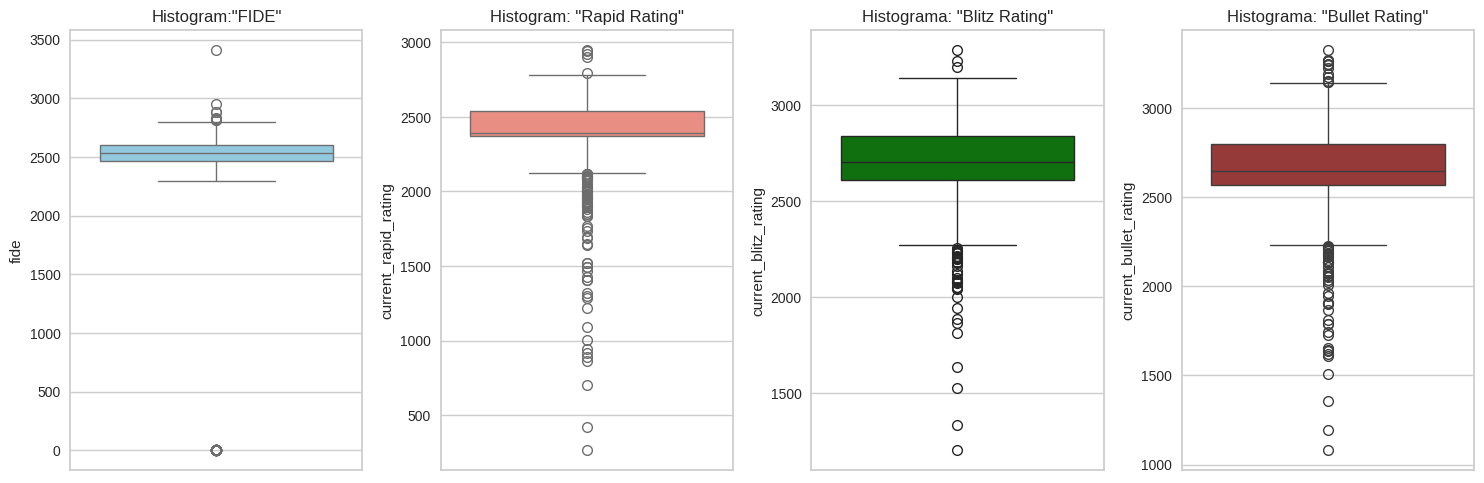

In [17]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(15, 5))

# Boxplot 1
sns.boxplot(dfStatics['fide'], ax=axes[0], color='skyblue')
axes[0].set_title('Histogram:"FIDE"')

# Boxplot 2
sns.boxplot(dfStatics['current_rapid_rating'], ax=axes[1], color='salmon')
axes[1].set_title('Histogram: "Rapid Rating"')

# Boxplot 3
sns.boxplot(dfStatics['current_blitz_rating'], ax=axes[2], color='green')
axes[2].set_title('Histograma: "Blitz Rating"')


# Boxplot 4
sns.boxplot(dfStatics['current_bullet_rating'], ax=axes[3], color='brown')
axes[3].set_title('Histograma: "Bullet Rating"')

# Ajustar el diseño
plt.tight_layout()
plt.show()

La cantidad de los llamados "datos atípicos" es notoria. Sigamos indagando:

### Z-Score

Si bien hemos imputado los datos nulos, notamos que existen muchos datos en 0, lo cual genera mucho sesgo a la hora de interpretar los datos. Si es un dataset de GM de ajedrez su rating y su elo fide no pueden ser 0, esto es simplemente un error y debemos corregirlo.

In [28]:
# quitamos los valores nulos y 0
dfStatics = dfStatics[(dfStatics['fide'].notna()) & (dfStatics['fide'] != 0)].reset_index(drop=True)
dfStatics = dfStatics[(dfStatics['current_rapid_rating'].notna()) & (dfStatics['current_rapid_rating'] != 0)].reset_index(drop=True)

El Z-Score es una medida que cuantifica la relación de un punto de datos particular con la media de un conjunto de datos y su dispersión en términos de desviación estándar. El Z-score indica cuántas desviaciones estándar un punto de datos específico está del promedio.

In [29]:
dfStatics['z_score_fide'] = ((dfStatics['fide'] - dfStatics['fide'].mean())/dfStatics['fide'].std())
dfStatics['z_score_rapid'] = ((dfStatics['current_rapid_rating'] - dfStatics['current_rapid_rating'].mean())/dfStatics['current_rapid_rating'].std())
dfStatics['z_score_followers'] = ((dfStatics['followers'] - dfStatics['followers'].mean())/dfStatics['followers'].std())


Obtenemos los outliers en base a la regla empírica, que nos dice que el 99,7% de los datos de una distribución normal se hallan a 3 desviaciones standards de la media:

In [30]:
outliersFide = dfStatics[(dfStatics['z_score_fide'] > 3) | (dfStatics['z_score_fide'] < -3)]
outliersRatings = dfStatics[(dfStatics['z_score_rapid'] > 3) | (dfStatics['z_score_rapid'] < -3)]
outliersFollowers = dfStatics[(dfStatics['z_score_followers'] > 3) | (dfStatics['z_score_followers'] < -3)]

Según esta regla: ¿cuales serían los outliers en la variable ['followers']?

In [31]:
outliersFollowers

,username,name,fide,current_rapid_rating,current_blitz_rating,current_bullet_rating,followers,z_score_fide,z_score_rapid,z_score_followers
3,magnuscarlsen,Magnus Carlsen,2882,2925,3287.0,3249.0,142482,3.258386,1.961895,3.124238
6,hikaru,Hikaru Nakamura,2814,2781,3232.0,3326.0,1163963,2.563130,1.422792,25.972036


Esta respuesta tiene sentido. Hikaru Nakamura (n1 en ajedrez bullet) y Magnus Carlsen (n1 de ajedrez estandar y tal vez el mejor ajedrecista de todos los tiempos) son actualmente los jugadores más populares del mundo.

### Histogramas

Al observar un histograma, es posible obtener una comprensión visual de la centralidad, dispersión, sesgo y forma de la distribución de datos. Además, puede ayudar a identificar la presencia de modas, picos o colas en la distribución.

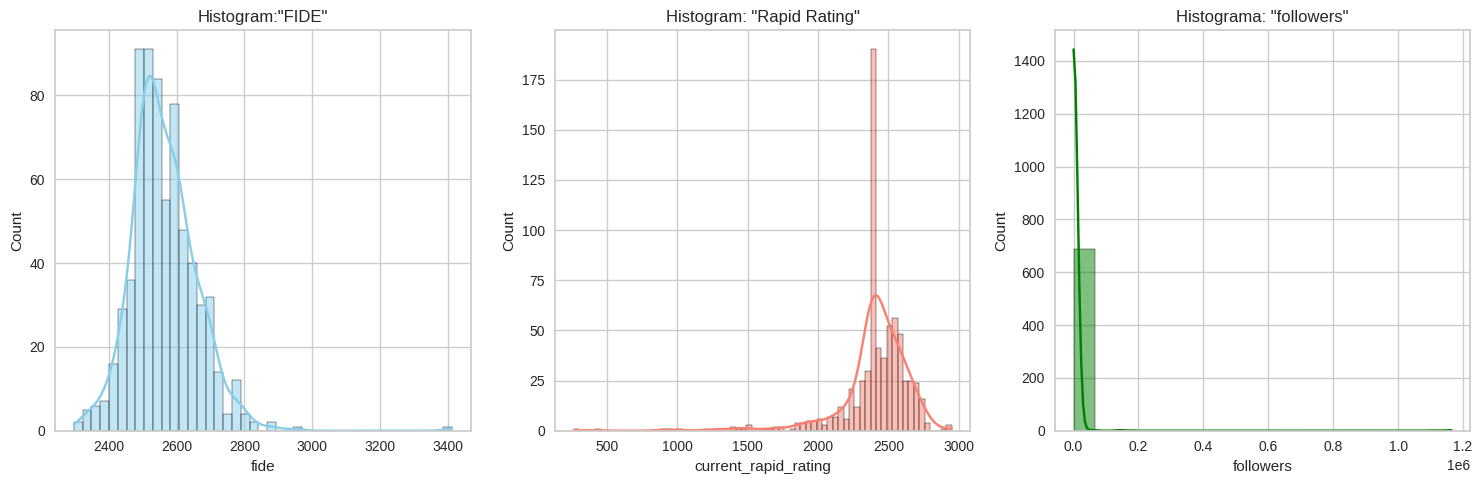

In [22]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Histograma 1
sns.histplot(dfStatics['fide'], kde=True, ax=axes[0], color='skyblue')
axes[0].set_title('Histogram:"FIDE"')

# Histograma 2
sns.histplot(dfStatics['current_rapid_rating'], kde=True, ax=axes[1], color='salmon')
axes[1].set_title('Histogram: "Rapid Rating"')

# Histograma 3
sns.histplot(dfStatics['followers'], kde=True, bins= 18,ax=axes[2], color='green')
axes[2].set_title('Histograma: "followers"')

# Ajustar el diseño
plt.tight_layout()
plt.show()

El primer histograma tiene una cola hacia la derecha, lo que implica una concentración de datos en valores más bajos y algunos valores extremadamente altos. Este resultado como dijimos más arriba puede contener datos inexactos. Magnus Carlsen, el n1 del mundo, para el año 2024, tiene 2830 de Elo en partidas estandar. Esto implicaría que aquellos Elos superiores podrían ser inventados.

El segundo histograma, por el contrario, presenta un sesgo negativo, es decir, concentración de datos en valores más altos y algunos valores extremadamente bajos. Al mismo tiempo observamos un bin que se dispara muy por encima de la curva de distribución, es decir, que existe un valor o un rango especifico de valores con una frecuencia alta.
Veamos cual es ese valor:

In [32]:
dfStatics['current_rapid_rating'].value_counts()

2390    151
2686      4
2500      4
2374      4
2624      4
       ... 
2187      1
2394      1
2329      1
2215      1
2103      1
Name: current_rapid_rating, Length: 378, dtype: int64

Observamos que el rating 2390 se repite 151 veces, muy por encima de la frecuencia del resto de los valores.

El tercer histograma tiene un sesgo positivo agravado por un desbalanceo de datos mayúsculo, producto de una variabilidad significativa en la cantidad de seguidores. La mayoria de los usuarios no tiene seguidores, o apenas tienen algunos pocos, mientras, por el contrario, unos pocos usuarios tienen muchísimos seguidores.

In [33]:
dfStatics['followers'].value_counts()

0        19
3        12
1        11
15        8
5         7
         ..
14206     1
2279      1
48        1
782       1
2892      1
Name: followers, Length: 432, dtype: int64

### Outliers

En la sección Z-Score hemos realizado el procedimiento de la regla empírica para detectar datos atípicos. Utilizaremos este método para observar en un gráfico de dispersión estas anomalías:

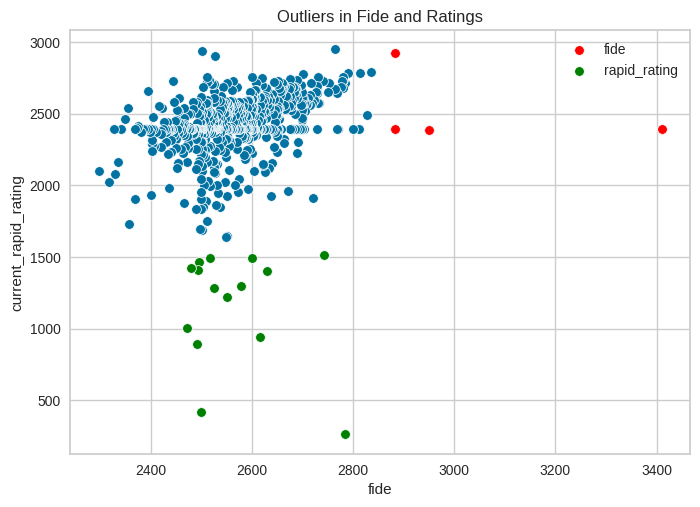

In [34]:
# Scatter plot for the entire DataFrame
sns.scatterplot(data=dfStatics, x='fide', y='current_rapid_rating')

# Scatter plot for outliersFide with red color
sns.scatterplot(data=outliersFide, x='fide', y='current_rapid_rating', c='red', label='fide')
sns.scatterplot(data=outliersRatings, x='fide', y='current_rapid_rating', c='green', label='rapid_rating')
plt.title('Outliers in Fide and Ratings')
plt.legend()


plt.show()

Encontramos que algunos GM con un Elo Fide considerable tienen un rating en partidas rapidas muy bajo. ¿Será porque han preferido jugar otro tipo de partidas y nunca han realizado puntos en esta categoría? O tal vez porque abrieron la cuenta pero nunca la han utilizado realmente?
Veamos el dataset:

In [36]:
outliersRatings.head(4)

,username,name,fide,current_rapid_rating,current_blitz_rating,current_bullet_rating,followers,z_score_fide,z_score_rapid,z_score_followers
11,gmnakamuracyborg,Hikaru Nakamura,2785,263,2697.616963,2648.433281,62,2.266623,-8.004033,-0.061316
24,alexonischuk,Alex Onischuk,2742,1517,2196.000000,2648.433281,121,1.826975,-3.309339,-0.059997
144,gmjuliogranda,Julio Granda,2630,1406,2339.000000,1656.000000,1016,0.681847,-3.724898,-0.039978
173,gmg,Andrey Gorovets,2616,941,2836.000000,2442.000000,1929,0.538705,-5.465754,-0.019557


La respuesta podria ser que algunos usuarios no son realmente Gran Maestros. El usuario "gmnakamuracyborg" simplemente utiliza el nombre de Nakamura, pero esta no es realmente la cuenta del n1 del bullet.

Siguiendo con el análisis de la gráfica de dispersión hecha más arriba, sabemos que la variable FIDE no es confiable (de hecho observamos como la cuenta falsa de Hikaru, señalada aquí mismo, si tiene el FIDE correcto), veamos que filas son consideradas atípicas:

In [37]:
outliersFide

,username,name,fide,current_rapid_rating,current_blitz_rating,current_bullet_rating,followers,z_score_fide,z_score_rapid,z_score_followers
0,komodochess,Komodo Engine,3411,2390,2697.616963,2648.433281,494,8.667075,-0.041024,-0.051654
1,vojtechplat,Vojtěch Plát,2950,2383,2823.000000,2661.000000,360,3.953643,-0.067231,-0.054651
2,playmagnus,PlayMagnus Carlsen,2882,2390,2697.616963,2648.433281,199,3.258386,-0.041024,-0.058252
3,magnuscarlsen,Magnus Carlsen,2882,2925,3287.000000,3249.000000,142482,3.258386,1.961895,3.124238


Que el Magnus Carlsen verdadero tenga un FIDE destacado es comprensible. ¿Será que la otra cuenta es un bot? La cuenta 'komodochess' tiene toda la apariencia de serlo.

### Eliminación o no de outliers

No siempre es una buena decisión eliminar outliers. Muchas veces pueden indicarnos información valiosa o pistas de algunas tendencia oculta. Lo cierto es que como haremos más de un experimento de clustering, no eliminaremos, en esta primera instancia, aquellos datos atípicos, aún con el resguardo y la concienza de que podrían entorpecer nuestras conclusiones.

# Un poco más de EDA

### Top Ten de ratings en partidas rápidas

El ajedrez rápido es una modalidad de ajedrez en la que cada jugador dispone de una hora o menos de tiempo total para ejecutar todos sus movimientos.

In [41]:
top10 = df1.sort_values(by='current_rapid_rating', ascending = False).head(10).loc[:,['username','name','current_rapid_rating']].drop_duplicates(subset=['username'], keep='last')
top10

,username,name,current_rapid_rating
21,anishonyoutube,Anish Giri,2948
524,gutovandrey,Andrey Gutov,2940
3,magnuscarlsen,Magnus Carlsen,2925
426,michaelq2d5,Michael Brown,2903
4,fabianocaruana,Fabiano Caruana,2794
6,hikaru,Hikaru Nakamura,2781
9,levonaronian,Levon Aronian,2781
774,vaathi_coming,Aravindh Chithambaram,2780
46,bigfish1995,Vladimir Fedoseev,2778
224,gm_mouse_sleep,Daniele Vocaturo,2756


Anish Giri, el GM neerlandés figura como el n1.

### Distribución por Nacionalidad de los 50 Mejores Jugadores en el Ranking en partidas rápidas:

In [42]:
sort50 = df1.sort_values(by='current_rapid_rating', ascending=False).head(50).loc[:,['country','current_rapid_rating']]
topCountries = sort50.groupby('country').sum().sort_values(by='current_rapid_rating')['current_rapid_rating']


In [43]:
df_top_countries = pd.DataFrame({'country': topCountries.index, 'current_rapid_rating': topCountries.values})
px.pie(df_top_countries, values='current_rapid_rating', names='country',
       title='Distribución por Nacionalidad de los 50 Mejores Jugadores en partidas rápidas',
       color_discrete_sequence=px.colors.sequential.RdBu)


Estados Unidos lleva la delantera, seguido por Rusia y la India.

### Top 10 jugadores con mejor rating en partidas blitz

El ajedrez relámpago o blitz son las partidas de menos de 10 minutos sin incremento. El blitz de 3 minutos es bastante popular en las plataformas online.

In [44]:
blitz10 = df1.sort_values(by='current_blitz_rating',ascending=False)[['username','name', 'current_blitz_rating']].head(10).reset_index(drop=True)
blitz10

,username,name,current_blitz_rating
0,magnuscarlsen,Magnus Carlsen,3287.0
1,hikaru,Hikaru Nakamura,3232.0
2,muisback26,Rauf Mamedov,3198.0
3,violord,Viorel Iordachescu,3142.0
4,danielnaroditsky,Daniel Naroditsky,3141.0
5,lyonbeast,Maxime Vachier-Lagrave,3127.0
6,fabianocaruana,Fabiano Caruana,3125.0
7,firouzja2003,Alireza Firouzja,3100.0
8,ghandeevam2003,Arjun Erigaisi,3089.0
9,duhless,Daniil Dubov,3088.0


En Blitz, Magnus Carlsen el n1.

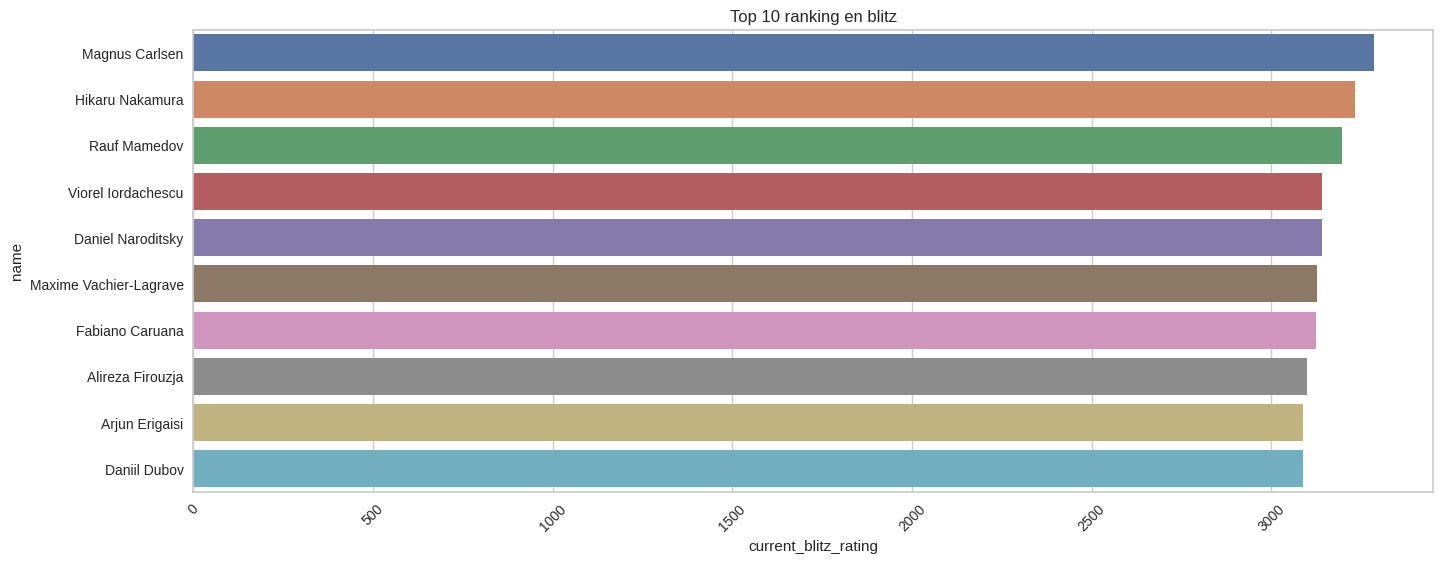

In [46]:
plt.figure(figsize=(16,6))
sns.barplot(blitz10, x='current_blitz_rating',y='name', palette='deep')
plt.title('Top 10 ranking en blitz')
plt.xticks(rotation=45)
plt.show()

### Top ten en partidas bullet

Se trata de partidas a 1 o 2 minutos por cada jugador, de las más populares en el ajedrez virtual, ya que es posible realizar movimientos más veloces que en un tablero físico.

In [48]:
bullet10 = df1.sort_values(by='current_bullet_rating',ascending=False)[['username','name', 'current_bullet_rating']].head(10).reset_index(drop=True)
bullet10

,username,name,current_bullet_rating
0,hikaru,Hikaru Nakamura,3326.0
1,danielnaroditsky,Daniel Naroditsky,3268.0
2,firouzja2003,Alireza Firouzja,3264.0
3,penguingm1,Andrew Tang,3262.0
4,magnuscarlsen,Magnus Carlsen,3249.0
5,oleksandr_bortnyk,Oleksandr Bortnyk,3241.0
6,anishgiri,Anish Giri,3224.0
7,nihalsarin,Nihal Sarin,3191.0
8,muisback26,Rauf Mamedov,3176.0
9,anishonyoutube,Anish Giri,3155.0


Hikaru el mejor en bullets: nada nuevo bajo el sol.

### Top Streamers with highest blitz ratings

Se suele decir que la gente disfruta mucho más hoy en día de mirar partidas blitz o bullets, que las partidas rapidas o estandar (aunque esto varía dependiendo del nível ajedrecistico del espectador). Veamos la cantidad de seguidores entre aquellos usuarios con mejor rating en este tipo de partidas:

In [49]:
streamers = df1[df1['is_streamer'] == True].sort_values(by='highest_blitz_rating', ascending=False)[['username','name', 'highest_blitz_rating','followers','country']].head(10).reset_index(drop=True)


In [50]:
streamers = streamers.dropna()
streamers

,username,name,highest_blitz_rating,followers,country
0,hikaru,Hikaru Nakamura,3332.0,1163963,United States
1,nihalsarin,Nihal Sarin,3277.0,12921,Chile
2,danielnaroditsky,Daniel Naroditsky,3249.0,25031,United States
3,lachesisq,Ian Nepomniachtchi,3204.0,10040,Russia
4,bigfish1995,Vladimir Fedoseev,3174.0,3027,Samoa
5,lyonbeast,Maxime Vachier-Lagrave,3143.0,10401,France
6,jospem,Jose Eduardo Martinez Alcantara,3121.0,14624,Mexico
7,oleksandr_bortnyk,Oleksandr Bortnyk,3109.0,8333,United States
8,jefferyx,Jeffery Xiong,3107.0,1713,United States
9,raunaksadhwani2005,Raunak Sadhwani,3105.0,1090,India


Hikaru Nakamura es famoso por sus streamings. Podemos verlo explicar sus jugadas en tiempo real y a una velocidad asombrosa.

### Relacion entre ranking fide y los ratings en rapidas, blitz y bullets

In [56]:
df_fide = df1[['username','name','fide','highest_rapid_rating', 'highest_blitz_rating', 'highest_bullet_rating']]
df_fide = df_fide.dropna()

df_fide['fide'] = df_fide['fide'].astype('int')
df_fide['highest_rapid_rating'] = df_fide['highest_rapid_rating'].astype('int')
df_fide['highest_blitz_rating'] = df_fide['highest_blitz_rating'].astype('int')
df_fide['highest_bullet_rating'] = df_fide['highest_bullet_rating'].astype('int')

df_fide = df_fide[df_fide['fide'] != 0]


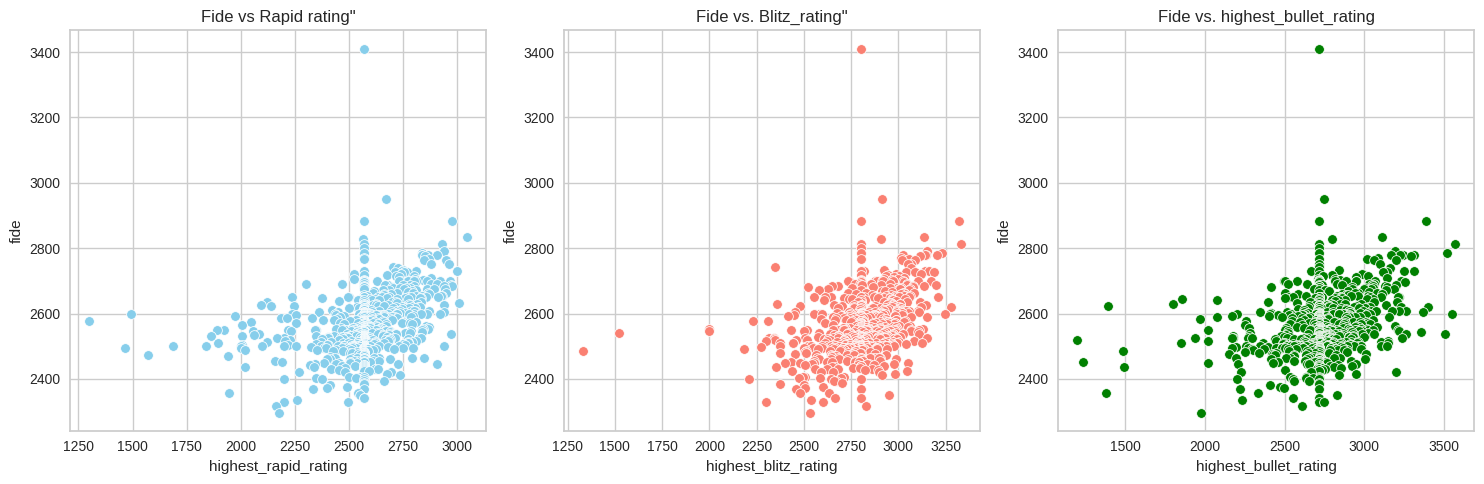

In [57]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Plot 1
sns.scatterplot(df_fide, x='highest_rapid_rating',y='fide', ax=axes[0], color='skyblue')
axes[0].set_title('Fide vs Rapid rating"')

# plot 2
sns.scatterplot(df_fide, x='highest_blitz_rating',y='fide', ax=axes[1], color='salmon')
axes[1].set_title('Fide vs. Blitz_rating"')


# plot 3
sns.scatterplot(df_fide, x='highest_bullet_rating',y='fide', ax=axes[2], color='green')
axes[2].set_title('Fide vs. highest_bullet_rating')

# Ajustar el diseño
plt.tight_layout()
plt.show()



Observamos una tenue, muy leve, correlación positiva entre las tres variables y la columna FIDE. Una correlación clara implicaría que a medida que el jugador eleva su rating en las distintas disciplinas, mejora tambien el FIDE, o viceversa. Esto no está del todo claro en las gráficas ya que podemos apreciar un achatamiento en la variable y. Sin embargo no descartaria rapidamente una regresión lineal si tuviera que elegir un modelo predictivo.

# Correlation Heatmap

Un mapa de calor de correlación es una representación gráfica de las correlaciones entre las variables de un conjunto de datos, generalmente mostrando los coeficientes de correlación en forma de colores. Los colores más intensos indican una correlación más fuerte, ya sea positiva o negativa.

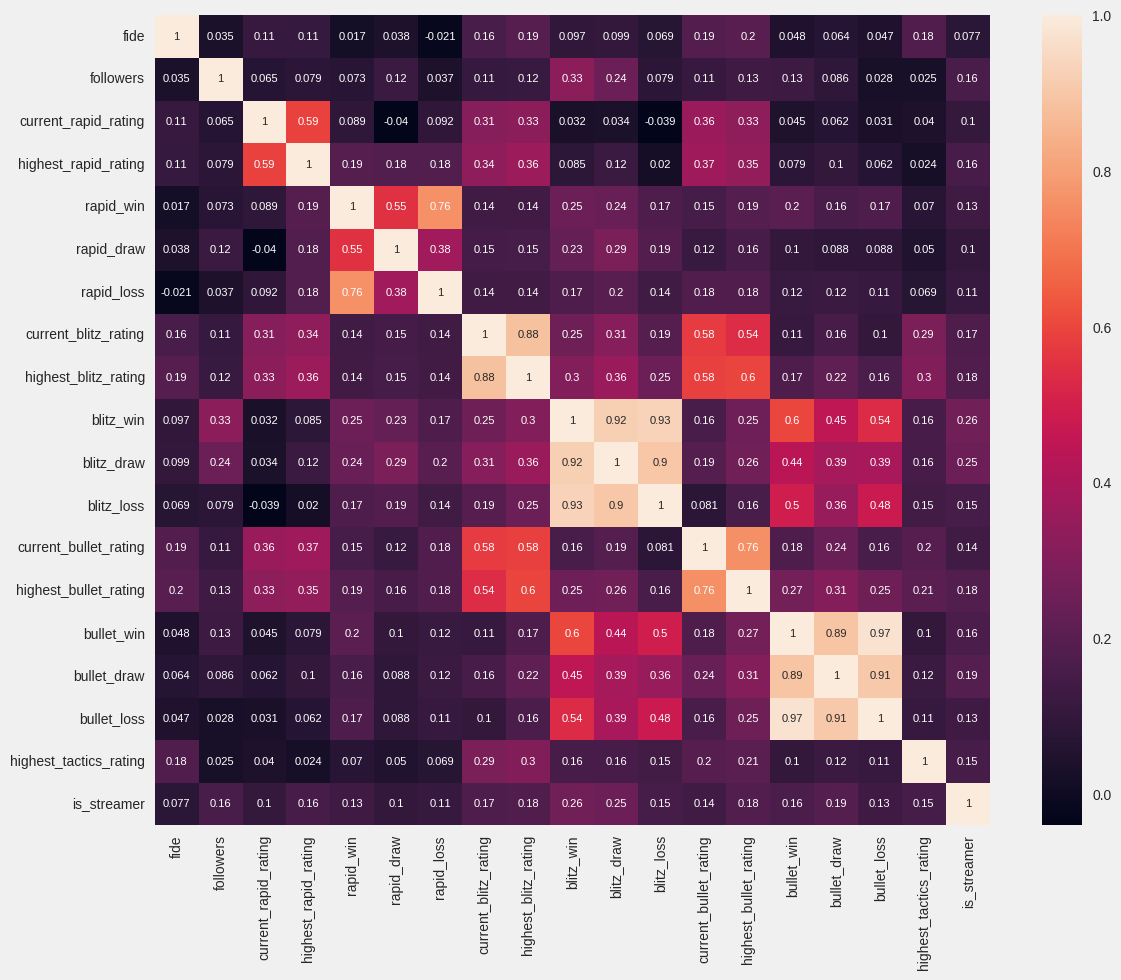

In [ ]:

#sacamos las correlaciones
df_corr = df1.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(df_corr, annot=True,annot_kws={"size": 8})
plt.show()

Practicamente no vemos existan correlaciones negativas fuertes (incluso el medidor no llega a -1). Si, en cambio, notamos muchas correlaciones positivas entre varias variables de nuestro dataset. Por ejemplo, las partidas blitz ganadas tiene una correlación altísima con las partidas perdidas o empatadas en la misma categoría; lo mismo ocurre con la categoria "bullet". Esta correlación no es tan evidente en las partidas rápidas.
Apreciamos esta misma interdependencia entre las variables "highest_rapid_rating" y "current_rapid_rating", así como en las versiones de blitz y bullets.

### Exclusión de variables redundantes

En base al análisis del HeatMap eliminaremos aquellas variables que consideramos redundantes:

In [66]:
cols = df1[['highest_rapid_rating', 'rapid_draw', 'rapid_loss', 'highest_blitz_rating', 'blitz_draw', 'blitz_loss', 'highest_bullet_rating', 'bullet_draw', 'bullet_loss']]

df_clean = df1.drop(cols, axis=1)


# Preprocesamiento para clustering

## Estandarización de datos

Hemos realizado al comienzo de nuestro camino, el proceso para sacar el Z-score en algunas variables. Ahora utilizaremos la libreria sklearn para normalizar todas nuestras variables numericas y asi poder hacer reducción de dimensionalidad y clustering.

In [67]:
#excluimos a las variables de tipo object
col_num = df_clean.select_dtypes(exclude=['object'])

In [68]:
# reemplazamos la columna booleana por 0 y 1
col_num['is_streamer'] = col_num['is_streamer'] .replace({True: 1, False: 0})

In [69]:
#escalamos con StardarScaler
scaler = StandardScaler()
scaled = scaler.fit_transform(col_num)
df_scaled = pd.DataFrame(scaled, columns = col_num.columns)
df_scaled.head()

,fide,followers,current_rapid_rating,rapid_win,current_blitz_rating,blitz_win,current_bullet_rating,bullet_win,highest_tactics_rating,is_streamer
0,1.346470,-0.046658,-0.001013,-1.027740e-16,-2.034009e-15,0.000000,0.000000,0.000000,-1.909752,-0.265478
1,0.835114,-0.049897,-0.025942,-3.758798e-01,5.608174e-01,-0.222796,0.047698,-0.326480,0.579249,-0.265478
2,0.759686,-0.053788,-0.001013,-1.027740e-16,-2.034009e-15,0.000000,0.000000,0.000000,-1.909752,-0.265478
3,0.759686,3.385304,1.904238,7.250891e-02,2.636212e+00,-0.063954,2.279506,-0.123013,-1.909752,-0.265478
4,0.707552,0.290549,1.437719,1.215177e+00,1.911613e+00,-0.209372,1.448271,-0.106542,0.813220,-0.265478


# Estadistico de Hopkins

Nuestros datos, ¿tienen tendencia a agruparse en grupos? Para contestar esta pregunta, vamos a calcular el estadístico de Hopkins. Cuanto más se acerque a 1 el resultado significa que los datos tienen una tendencia a agruparse y por lo tanto no estan distribuidos de forma aleatoria.


In [70]:
# function to compute hopkins's statistic for the dataframe X
def hopkins_statistic(X):

    X=X.values  #convert dataframe to a numpy array
    sample_size = int(X.shape[0]*0.05) #0.05 (5%) based on paper by Lawson and Jures


    #a uniform random sample in the original data space
    X_uniform_random_sample = uniform(X.min(axis=0), X.max(axis=0) ,(sample_size , X.shape[1]))



    #a random sample of size sample_size from the original data X
    random_indices=sample(range(0, X.shape[0], 1), sample_size)
    X_sample = X[random_indices]


    #initialise unsupervised learner for implementing neighbor searches
    neigh = NearestNeighbors(n_neighbors=2)
    nbrs=neigh.fit(X)

    #u_distances = nearest neighbour distances from uniform random sample
    u_distances , u_indices = nbrs.kneighbors(X_uniform_random_sample , n_neighbors=2)
    u_distances = u_distances[: , 0] #distance to the first (nearest) neighbour

    #w_distances = nearest neighbour distances from a sample of points from original data X
    w_distances , w_indices = nbrs.kneighbors(X_sample , n_neighbors=2)
    #distance to the second nearest neighbour (as the first neighbour will be the point itself, with distance = 0)
    w_distances = w_distances[: , 1]



    u_sum = np.sum(u_distances)
    w_sum = np.sum(w_distances)

    #compute and return hopkins' statistic
    H = u_sum/ (u_sum + w_sum)
    return H

In [71]:
hopkins_statistic(df_scaled)

0.9547026184857368

Cómo el valor de este estadístico depende de una comparación con una muestra aleatoria, lo vamos a calcular varias veces y promediar los distintos valores. De esta forma obtenemos un valor más consistente.

In [72]:
l = []
for i in range(20):
    H=hopkins_statistic(df_scaled)
    l.append(H)
#Valor del estadístico Hopkins promedio
np.mean(l)

0.9483191117477319

El número parece contundente: nuestros datos tienen tendencia a agruparse.

## Reducción de dimensionalidad

Para reducir la complejidad de nuestros datos, realizaremos la llamada "Reducción de dimensionalidad" a través del método de "Principal Component Analysis". PCA transforma las variables originales en un nuevo conjunto de variables no correlacionadas llamadas "componentes principales". Estos componentes principales están ordenados por la cantidad de varianza que explican en los datos originales. Al seleccionar un número menor de componentes principales que retengan una alta proporción de la varianza total, se logra la reducción de dimensionalidad.

**PCA**

In [73]:

# PCA
pca = PCA()
df_PCA = pca.fit_transform(df_scaled)

# Convertimos el resultado en un dataframe
component_names = [f"PC{i+1}" for i in range(df_PCA.shape[1])]
df_PCA = pd.DataFrame(df_PCA, columns=component_names)

df_PCA.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,-0.319611,-0.066447,0.524299,0.381187,1.324994,1.413290,-0.243814,1.036473,-0.323899,0.120009
1,0.183686,-0.827493,-0.829793,0.209923,0.319776,-0.033226,0.250346,0.025114,-0.268426,0.176248
2,-0.435833,0.058953,0.825941,0.277923,1.061904,1.041764,-0.278627,0.976213,-0.306025,0.087273
3,2.855323,-1.636335,2.887453,2.653939,1.333143,0.105918,1.261444,1.066130,-0.115399,0.900269
4,2.297929,-1.918850,0.504694,-0.530925,0.057862,0.169450,0.951945,-0.185209,-0.183407,0.402770


Determinamos el número de componentes principales que utilizaremos a partir de observar el gráfico de varianza acumulada:

In [74]:

def plot_variance(pca, width=8, dpi=100):
    # Create figure
    fig, axs = plt.subplots(1, 2)
    n = pca.n_components_
    grid = np.arange(1, n + 1)
    # Explained variance
    evr = pca.explained_variance_ratio_
    axs[0].bar(grid, evr)
    axs[0].set(
        xlabel="Componente", title="% Varianza Explicada", ylim=(0.0, 1.0)
    )
    # Cumulative Variance
    cv = np.cumsum(evr)
    axs[1].plot(np.r_[0, grid], np.r_[0, cv], "o-")
    axs[1].set(
        xlabel="Componente", title="% Varianza Acumulada", ylim=(0.0, 1.0)
    )
    # Set up figure
    fig.set(figwidth=8, dpi=100)
    return axs

array([<Axes: title={'center': '% Varianza Explicada'}, xlabel='Componente'>,
       <Axes: title={'center': '% Varianza Acumulada'}, xlabel='Componente'>],
      dtype=object)

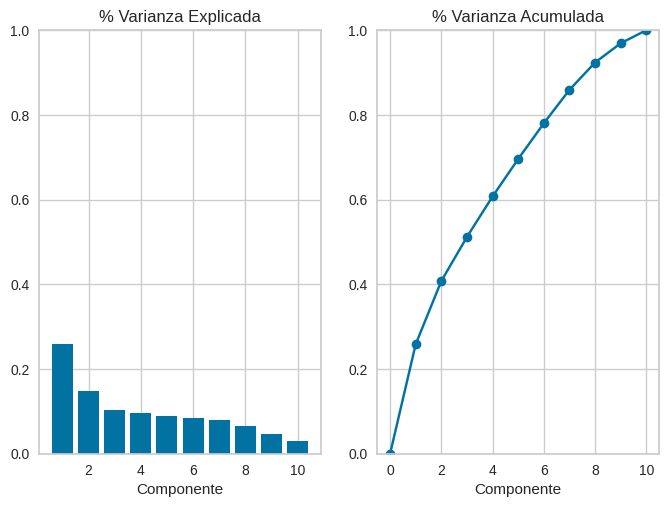

In [75]:

plot_variance(pca)

Podemos observar que el primer pca explica casi el 30% de la varianza de los datos y que el segundo y el tercero rondan alrededor de un 10%. En el gráfico de varianza acumulada observamos que con 6 componentes princiapales podemos obtener casi el 80% de la varianza de nuestros datos. Vamos a probar con esa cantidad.

In [78]:
#veamos como las cargas factoriales para cada componente:

loadings = pd.DataFrame(
    pca.components_.T,
    columns=component_names,
    index=df_scaled.columns,
)
loadings_6 = loadings.iloc[:, :6]
loadings_6

,PC1,PC2,PC3,PC4,PC5,PC6
fide,0.195266,-0.216815,-0.516357,0.167256,0.448062,0.633988
followers,0.230450,0.255750,0.189053,0.718179,0.024522,-0.068469
current_rapid_rating,0.257751,-0.390294,0.443436,0.078414,0.064989,0.210511
rapid_win,0.246190,0.177720,0.240005,-0.539364,-0.259993,0.460308
current_blitz_rating,0.424547,-0.346681,0.051442,-0.041023,-0.038037,-0.295987
blitz_win,0.412088,0.458623,-0.041258,0.002427,0.190978,-0.099923
current_bullet_rating,0.411837,-0.371208,0.180049,-0.055633,0.103694,-0.164327
bullet_win,0.340930,0.444592,-0.003331,-0.251672,0.340994,-0.110955
highest_tactics_rating,0.260441,-0.142449,-0.628353,-0.136664,-0.281986,-0.333037
is_streamer,0.279267,0.131901,-0.108594,0.269040,-0.694518,0.298917


Grafiquemos los loadings para poder apreciar de forma visual el peso de cada variable para cada componente principal:

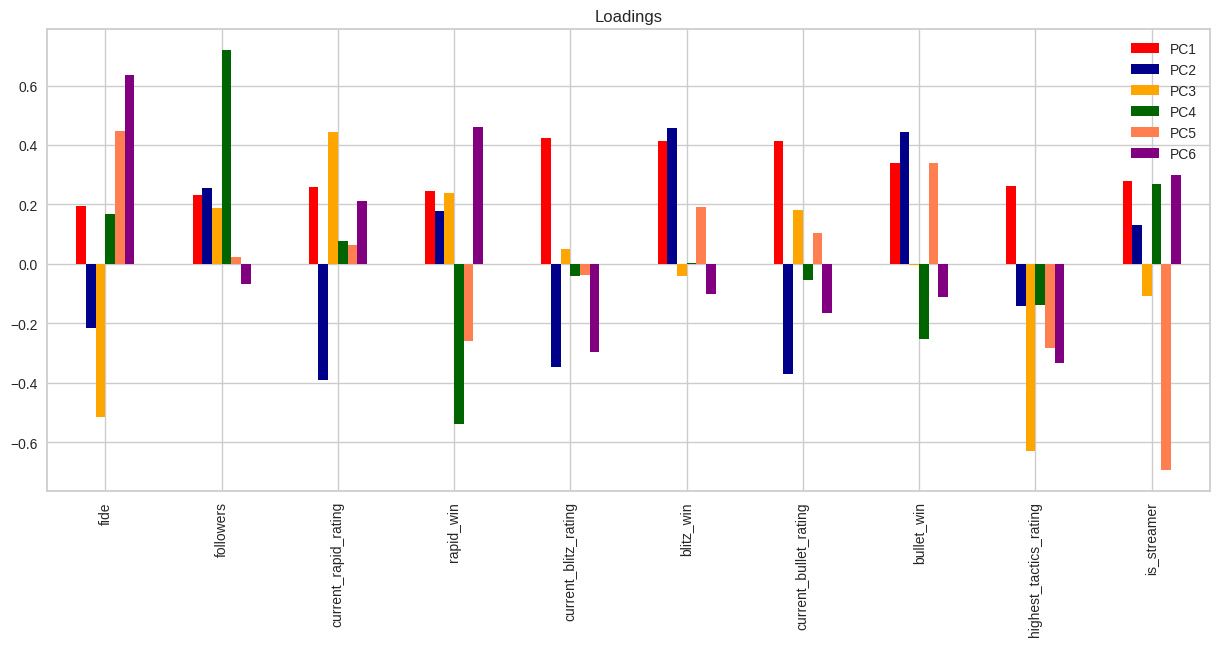

In [79]:

color = ['red','darkblue','orange','darkgreen','coral', 'purple','magenta']
ax = loadings_6 \
    .plot(kind='bar', figsize=(15,6), color=color, title='Loadings')
plt.show()

A partir de visualizar estas gráficas, podemos apreciar que:
*   en el PC1 hay una leve preponderancia de las variables "current_blitz_rating","blitz_win" y "current_bullet_rating", aunque con una distribución en general bastante homogénea en el resto de las variables.
*   El PC2 agrega a estas preponderancias las variables "bullet_win" y "current_rapid_rating".
*   "highest_tactics_rating" es la variable preponderante es PC3

A medida que nos alejamos del PC1, los componentes principales dejan de tener una varianza que explique el conjunto de datos en su totalidad y comienzan poco a poco a verse determinados por una u otra variable.




In [80]:
#creamos un df con los 6 componentes principales
df_PCA = df_PCA[['PC1','PC2','PC3','PC4','PC5','PC6']]

Graficamos primer y segundo componente:

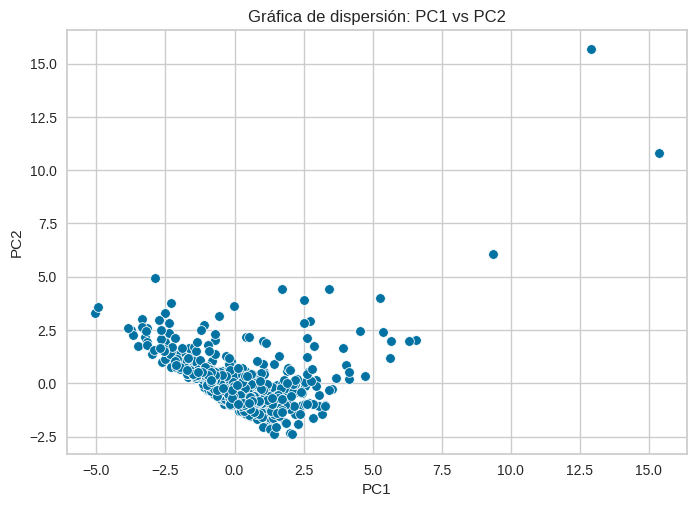

In [82]:

ax = sns.scatterplot(x='PC1',
                y='PC2',
                data=df_PCA)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Gráfica de dispersión: PC1 vs PC2')
plt.show()

Focalizemos sobre los primeros 4 componentes pricipales:

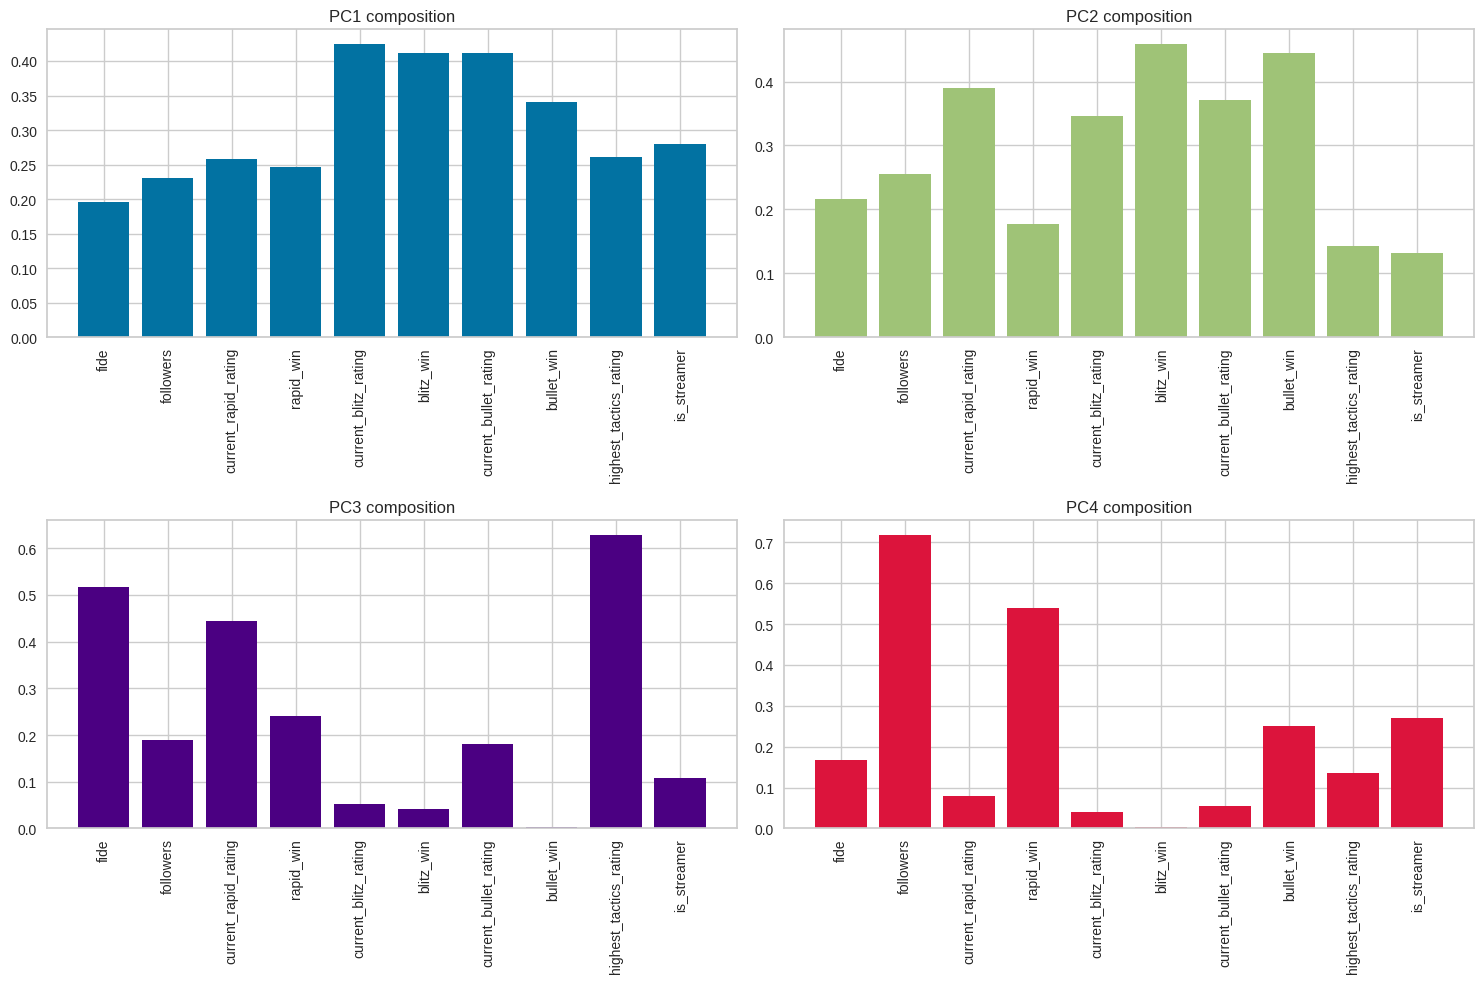

In [83]:
ig, axs = plt.subplots(2, 2, figsize=(15, 10))


axs[0,0].bar(loadings_6.index, abs(loadings_6['PC1']), color='b')
axs[0,0].set_title('PC1 composition')


axs[0,1].bar(loadings_6.index, abs(loadings_6['PC2']), color='g')
axs[0,1].set_title('PC2 composition')

axs[1,0].bar(loadings_6.index, abs(loadings_6['PC3']), color='indigo')
axs[1,0].set_title('PC3 composition')

axs[1,1].bar(loadings_6.index, abs(loadings_6['PC4']), color='crimson')
axs[1,1].set_title('PC4 composition')


axs[0,0].set_xticklabels(loadings_6.index, rotation=90)
axs[0,1].set_xticklabels(loadings_6.index, rotation=90)
axs[1,0].set_xticklabels(loadings_6.index, rotation=90)
axs[1,1].set_xticklabels(loadings_6.index, rotation=90)
plt.tight_layout()
plt.show()

Para reafirmar lo dicho más arriba sobre la composición de los PCs, comparemos las gráficas del PC1 y PC2 con las del PC3 y PC4. Nótese que en los primeros la composición tiende a ser repartida homogéneamente, mientras que en los últimos, empiezan a destacar y sobresalir algunas variables, mientras que otras  tienen una carga factorial cercana a 0.

# ZONA CLUSTERING

## K- means


K-means es un algoritmo de clustering que particiona un conjunto de datos en k grupos (donde k es el número predefinido de clusters) según las similitudes entre las características de las observaciones.
El proceso implica asignar cada punto de datos al cluster cuyo centroide (punto central del cluster) es el más cercano. El algoritmo itera entre la asignación de observaciones a clusters y la actualización de los centroides hasta converger hacia una solución estable, donde las asignaciones y los centroides no cambian significativamente.

Iteremos, entonces, en busca del mejor K para nuestro modelo:

In [84]:
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}

# SSE: Sum of Square Error
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(df_PCA)
    sse.append(kmeans.inertia_)

### Elbow Method


El método del codo (Elbow Method) es una técnica utilizada para encontrar el número óptimo de clusters (grupos) en un conjunto de datos, especialmente en algoritmos de clustering como K-means. La idea fundamental es observar cómo varía la suma de errores cuadráticos (SSE) en función del número de clusters. El SSE mide la dispersión de los puntos de datos dentro de un cluster respecto a su centroide.

El procedimiento implica ajustar el modelo de clustering para diferentes valores de k (número de clusters) y calcular el SSE para cada configuración. Luego, se grafica el número de clusters contra el SSE y se busca el punto en el que la disminución del SSE se desacelera, formando un "codo" en la gráfica. Este "codo" sugiere el número óptimo de clusters, ya que más clusters no proporcionarían una mejora significativa en la reducción de SSE.

Grafiquemos los valores de la suma de los cuadrados de las distancias para cada valor de k:

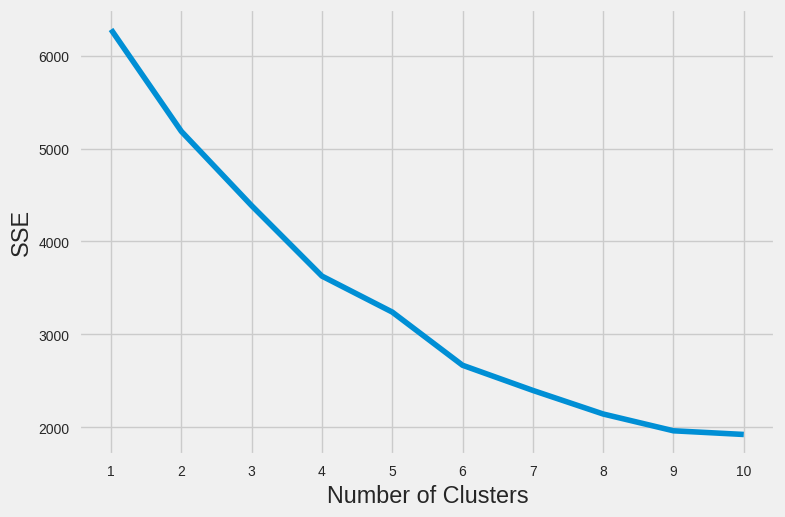

In [85]:
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

El codo parece estar en 4 o en 6; utilizaremos la biblioteca KneeLocator para encontrar automáticamente el punto de "codo" en la gráfica del método del codo:



In [89]:

kl = KneeLocator(
    range(1, 11), sse, curve="convex", direction="decreasing"
)
print(f'Número de clusters según el Elbow Method: {kl.elbow}')


Número de clusters según el Elbow Method: 6


El numero de cluster para K-means será 6:

In [87]:
kmeans = KMeans(
    init="random",
    n_clusters=6,
    n_init=10,
    max_iter=300,
    random_state=42
)
kmeans.fit(df_PCA)

KMeans(init='random', n_clusters=6, n_init=10, random_state=42)

In [90]:
print(f'cluster centers: {kmeans.cluster_centers_}')
print(f'labels: {kmeans.labels_}')

cluster centers: [[-2.35864438  2.17366864 -1.48721778  0.01295465 -0.41683649  0.02183833]
 [-1.04317733  0.51716524  1.46889268 -0.30386842 -0.89118521 -1.3729663 ]
 [ 0.61934696 -0.62308186 -0.38808631 -0.10133761  0.26937353 -0.22782077]
 [ 2.64742489  0.49750039 -0.20828082 -0.12768644 -2.19579557  1.30516621]
 [12.54058253 10.84613119  1.46381783  3.93772962  3.75083181 -1.64999431]
 [-0.77966199  0.04455799  0.22046812  0.24980653  0.5151983   0.61965811]]
labels: [5 2 5 2 2 2 4 5 5 2 2 0 2 2 3 3 2 2 5 2 2 2 5 3 0 3 2 2 5 5 2 2 2 3 2 3 2
 5 2 2 2 2 3 5 2 5 3 5 2 2 2 2 5 2 5 5 5 2 2 2 5 2 5 2 5 2 2 2 2 5 2 2 3 5
 5 2 2 2 5 2 2 2 5 2 2 2 5 2 2 5 5 2 2 2 2 2 2 3 5 3 2 3 2 2 2 5 2 2 2 2 5
 5 3 5 5 5 5 5 2 5 2 0 2 2 2 5 2 5 2 3 2 2 2 3 5 2 2 5 2 3 2 2 5 5 0 2 2 2
 2 5 2 2 2 5 5 5 5 2 5 2 2 5 2 2 3 2 3 2 5 2 5 2 2 3 2 5 2 3 5 2 5 2 2 2 3
 3 3 2 3 2 3 3 0 3 3 2 5 2 2 5 2 2 3 5 2 2 5 2 2 5 4 2 2 2 2 5 2 5 5 5 2 5
 3 2 2 2 2 3 5 5 2 2 2 2 5 2 2 5 5 2 2 5 3 2 5 5 3 2 2 2 5 4 5 2 5 5 2 2 2

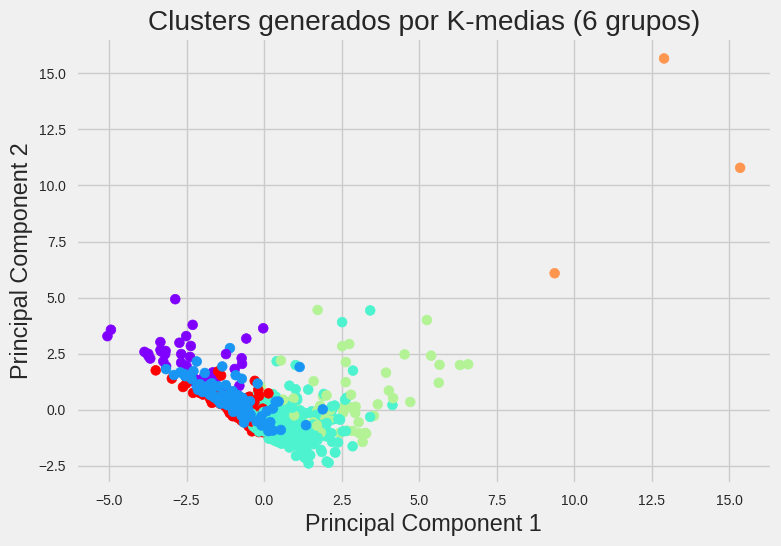

In [91]:
plt.scatter(df_PCA['PC1'], df_PCA['PC2'], c = kmeans.labels_, cmap='rainbow')
plt.title('Clusters generados por K-medias (6 grupos)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

Recordemos que esta gráfica es, obviamente, en 2 dimensiones y que la diferenciación de grupos esta hecha sobre 6 dimensiones. Aún así podemos apreciar una división bastante difusa cuando representamos los clusters en los primeros 2 componentes principales.

## Clustering Jerárquico

El Clustering Jerárquico es un método de clustering que organiza los datos en una estructura de árbol o dendrograma, representando la relación jerárquica entre los clusters. Comienza considerando cada punto de datos como un cluster individual y, de manera iterativa, fusiona los clusters más cercanos hasta formar un único cluster que contiene todos los datos. Este proceso se repite hasta que todos los datos están en un solo cluster o hasta alcanzar un número predefinido de clusters.

### Método de enlace Promedio


El enlace promedio (average linkage) es un método utilizado en el Clustering Jerárquico para calcular la distancia entre dos clusters. En lugar de basarse en la distancia entre los puntos más cercanos o más lejanos de los clusters, como en otros métodos de enlace (por ejemplo, simple method o complete method), el average linkage considera la distancia promedio entre todos los pares de puntos, uno de cada cluster.

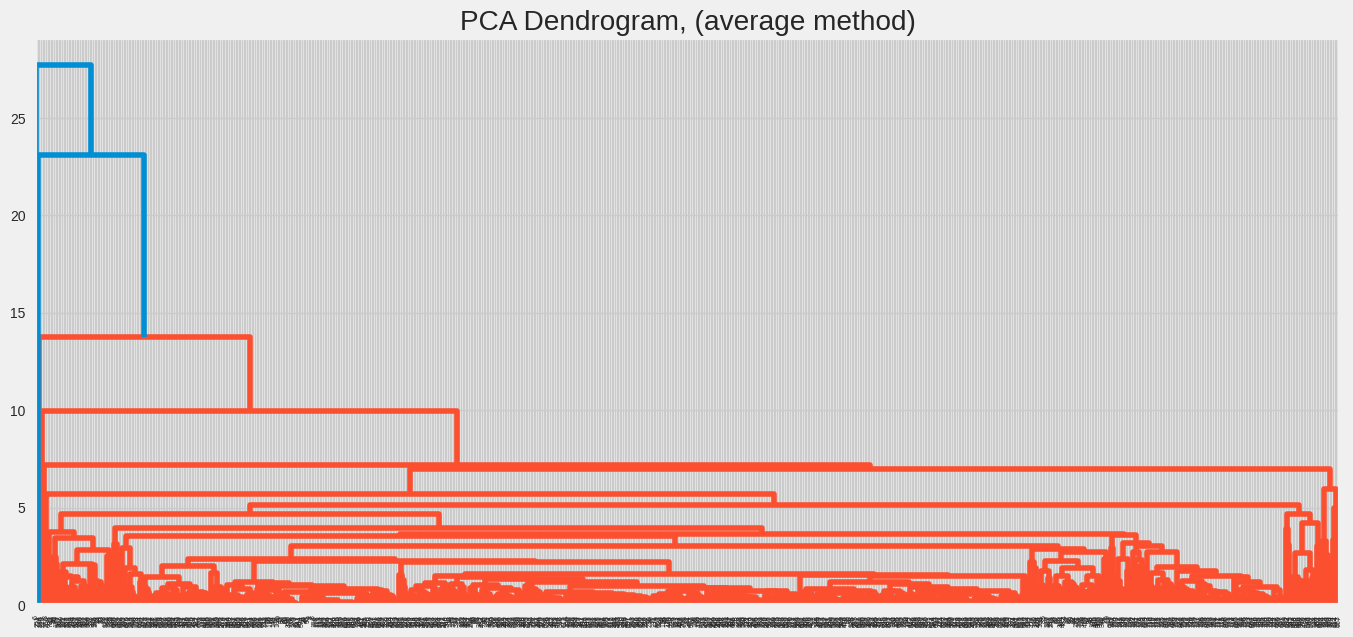

In [95]:
#Average linkage
plt.figure(figsize=(15, 7))
plt.title("PCA Dendrogram, (average method)")

clusters = shc.linkage(df_PCA,
            method='average',
            metric="euclidean")
shc.dendrogram(Z=clusters)
plt.show()

### Método Ward

El método de Ward, también conocido como el criterio de enlace de Ward, es uno de los métodos utilizados para calcular la distancia entre clusters en el Clustering Jerárquico. Este método busca minimizar la varianza total dentro de los clusters al fusionarlos. Es decir, se esfuerza por formar clusters que minimicen la suma de cuadrados de las diferencias entre cada punto y la media de su cluster.

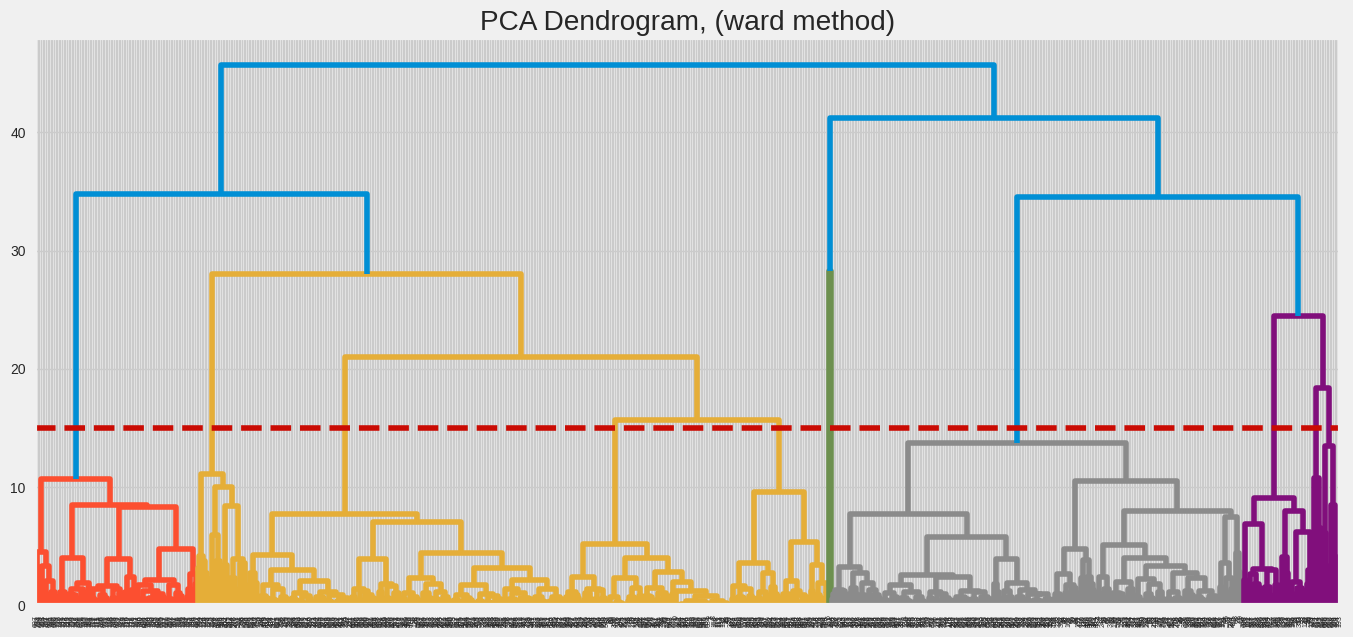

In [94]:

#Ward linkage
plt.figure(figsize=(15, 7))
plt.title("PCA Dendrogram, (ward method)")

clusters = shc.linkage(df_PCA,
            method='ward',
            metric="euclidean")
shc.dendrogram(Z=clusters)
plt.axhline(y = 15, color = 'r', linestyle = '--')
plt.show()

A partir del Ward method podemos reconocer 4 grupos. Tambien podriamos pensar en 5 grupos pero el grupo de color verde es poco significativo.

In [96]:
clustering_model = AgglomerativeClustering(n_clusters=4, metric='euclidean', linkage='ward')
clustering_model.fit(df_PCA)

print(f'labels: {clustering_model.labels_}')

labels: [1 0 1 0 0 0 2 1 1 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 1 1 0 0 0 0 0 0 1
 1 0 0 0 0 0 1 0 1 0 1 0 0 0 0 1 1 1 1 1 0 0 0 1 0 1 0 1 1 0 0 0 1 0 0 0 1
 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 1 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 1 0 0 1
 1 0 1 1 1 1 1 0 1 0 1 0 0 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 0 0 1 1 1 1 0 0 0
 1 1 0 0 0 1 1 1 1 0 1 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 1 0 0 1 1 0 1 0 1 1 0 0 1 1 1 1 1 0 1
 0 1 0 0 0 0 1 1 0 0 0 0 1 0 0 1 1 1 1 1 0 1 1 1 0 1 0 0 1 2 1 0 1 1 0 0 1
 1 1 1 1 1 1 0 0 1 1 0 1 1 0 1 1 1 1 0 0 1 1 1 1 1 0 1 1 0 0 0 1 0 1 1 0 1
 1 1 1 1 0 0 0 0 1 0 1 1 1 1 0 0 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 1 1 0 1 0 1
 0 0 1 0 1 0 1 0 0 1 1 0 1 1 1 1 1 0 0 1 0 1 0 1 0 0 0 1 1 0 1 0 1 1 0 0 0
 1 0 1 0 0 0 1 0 1 1 0 1 0 0 0 1 0 1 1 1 0 0 1 0 1 1 1 0 1 1 1 0 1 1 0 1 1
 1 0 1 0 0 0 0 1 1 1 1 0 0 1 1 1 1 1 1 0 0 1 1 0 1 0 1 1 1 0 1 1 0 1 1 0 1
 1 0 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 0 0 0 1 1 1 1 0 0 1 1 0 0 1 0
 1 0 1 1 1 1 1 0 

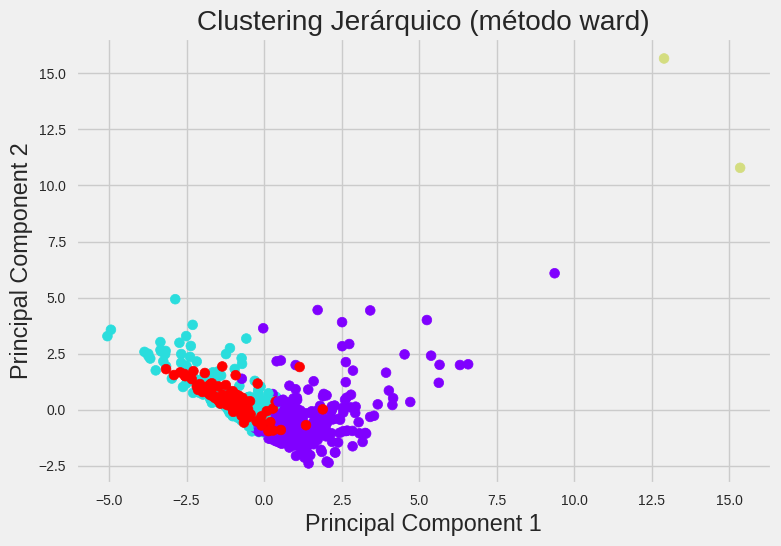

In [98]:
plt.scatter(df_PCA['PC1'], df_PCA['PC2'], c = clustering_model.labels_, cmap='rainbow')
plt.title('Clustering Jerárquico (método ward)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

El cuarto grupo dificilmemte puede apreciarse en esta gráfica, igualmente difusa que la realizada con K-means.

## DBScan

DBScan tiene dos parámetros muy importantes: minPts y Eps(radio). El minPts depende de la densidad de punto que tenemos en nuestro dataset y es dificil determinar un valor óptimo. Sin embargo, para determinar el radio podemos calcular la distancia que hay entre cada cada punto y su vecino más cercano (el punto que tiene más cerca). De esta manera vamos a poder tener una idea de qué valor le podemos dar a Eps.

Text(0, 0.5, 'Distancia')

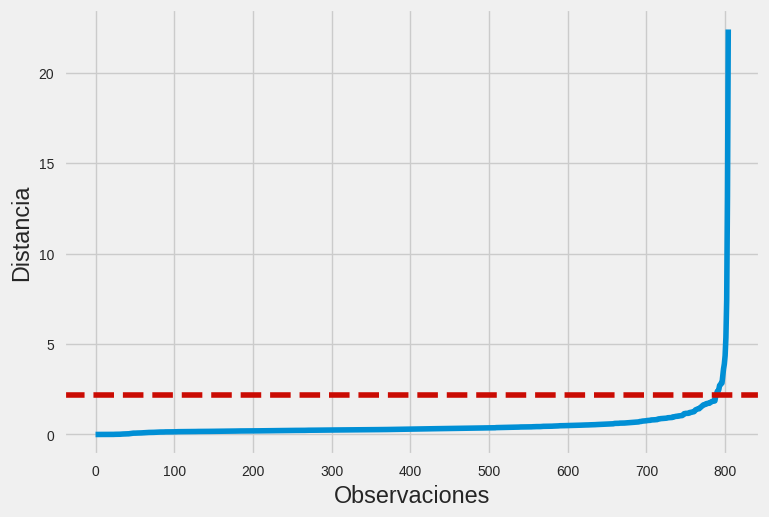

In [99]:
k = 2
data_nn = df_PCA.copy()

# Calculamos los vecinos más cercanos
nearest_neighbors = NearestNeighbors(n_neighbors=k)
neighbors = nearest_neighbors.fit(data_nn)
distances, indices = neighbors.kneighbors(data_nn)
distances = np.sort(distances, axis=0)

# Obtenemos las distancias
distances = distances[:,1]

i = np.arange(len(distances))

sns.lineplot(
    x = i,
    y = distances
)
plt.axhline(y = 2.2, color = 'r', linestyle = '--')
plt.xlabel("Observaciones")
plt.ylabel("Distancia")

A partir de la gráfica podemos realizar nuestro experimento con los epsilon que consideremos apropiados; en este caso, la línea se traza sobre el 2 o 2.5, por lo que consideramos esos valores en primera instancia.

In [104]:
#Realizamos el clustering
dbscan_clusters = DBSCAN(eps = 2, min_samples = 5).fit(df_PCA)

In [105]:
#Las observaciones que quedan con un valor de -1 son los puntos ruido (o outliers). Por lo que son las observaciones que no asignó a ningun cluster
dbscan_clusters.labels_

array([ 0,  0,  0, -1,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  1,  1,  0,
        0,  0,  0,  0,  0,  0,  1,  0,  1,  0,  0,  0,  0,  0,  0,  0,  1,
        0,  1,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  2,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  1,  0,  1,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  1,  0,  0,
       -1,  0,  0, -1,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  2,  0,  2,  0,  0,  0,
        0,  0,  0, -1,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  1,  1,  1,
        0,  1,  0,  1,  0,  0,  2,  1,  0,  0,  0,  0,  0,  0,  0,  1,  0,
        0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  1,  0,  0,  0

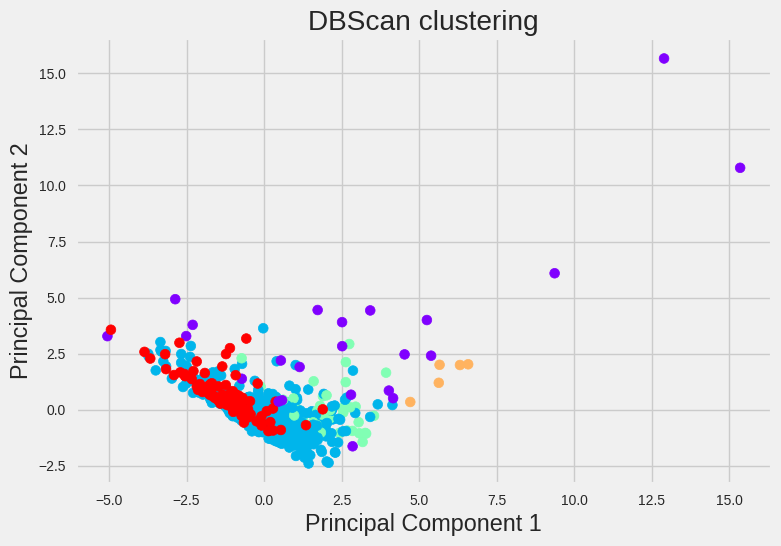

In [106]:

#Veamos que tal le fue
plt.scatter(df_PCA['PC1'], df_PCA['PC2'], c = dbscan_clusters.labels_, cmap='rainbow')
plt.title('DBScan clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

## Comparación de los 3 métodos de clustering

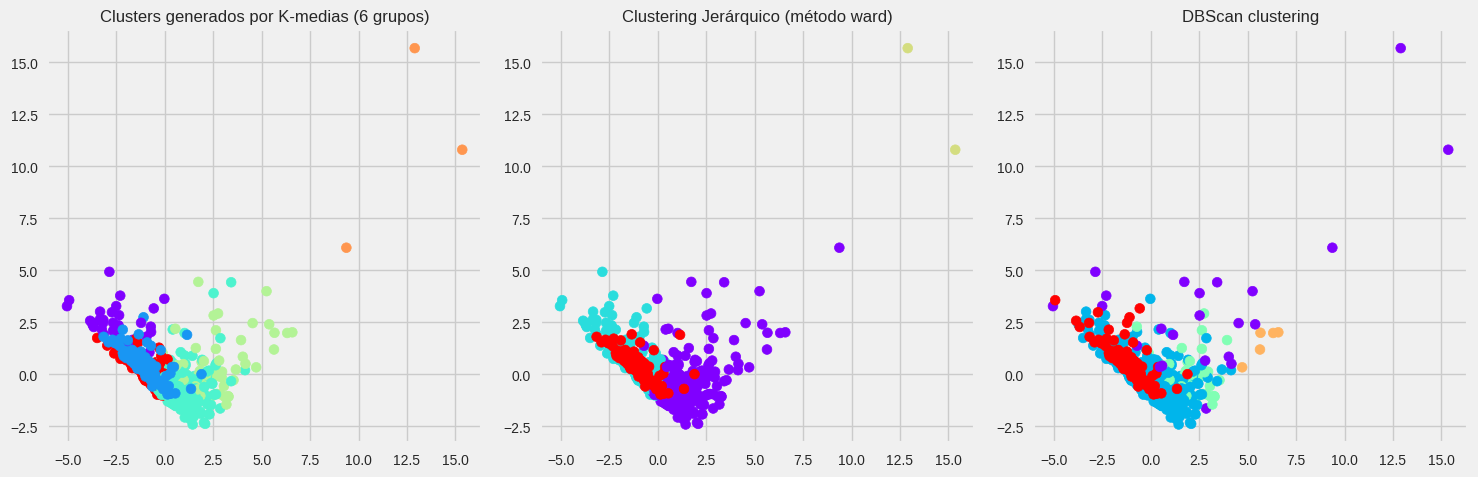

In [113]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))


# cluster 1
axes[0].scatter(df_PCA['PC1'], df_PCA['PC2'], c=kmeans.labels_, cmap='rainbow')
axes[0].set_title('Clusters generados por K-medias (6 grupos)', fontsize=12)

# cluster 2
axes[1].scatter(df_PCA['PC1'], df_PCA['PC2'], c=clustering_model.labels_, cmap='rainbow')
axes[1].set_title('Clustering Jerárquico (método ward)', fontsize=12)

# cluster 3
axes[2].scatter(df_PCA['PC1'], df_PCA['PC2'], c = dbscan_clusters.labels_, cmap='rainbow')
axes[2].set_title('DBScan clustering', fontsize=12)

# Ajustar el diseño
plt.tight_layout()
plt.show()

No es posible, a partir de las visualizaciones en 2D, poder apreciar que método resultó más efectivo. Para determinar esto utilizaremos la validación interna y externa. Pero antes, un poco por diversión y otro poco por curiosidad, crearemos un k-means de 3 grupos que tambien incorporaremos a los métodos de validación. Primero guardemos las etiquetas de los clusters anteriores:

### Guardamos las etiquetas de los clusters

In [114]:

#guardamos las etiquetas de los clusterings anteriores:
k_means6_labels = kmeans.labels_

hierarchical_clus_labels = clustering_model.labels_

dbscan_labels = dbscan_clusters.labels_

## K-means (3 grupos)

Vamos a generar un tercer cluster con k-means que contendra 3 grupos en vez de 6:

In [115]:

kmeans = KMeans(
    init="random",
    n_clusters=3, # asignamos 3 grupos
    n_init=10,
    max_iter=300,
    random_state=42
)
kmeans.fit(df_PCA)

KMeans(init='random', n_clusters=3, n_init=10, random_state=42)

In [116]:

#guardamos los resultados:
k_means3_labels = kmeans.labels_

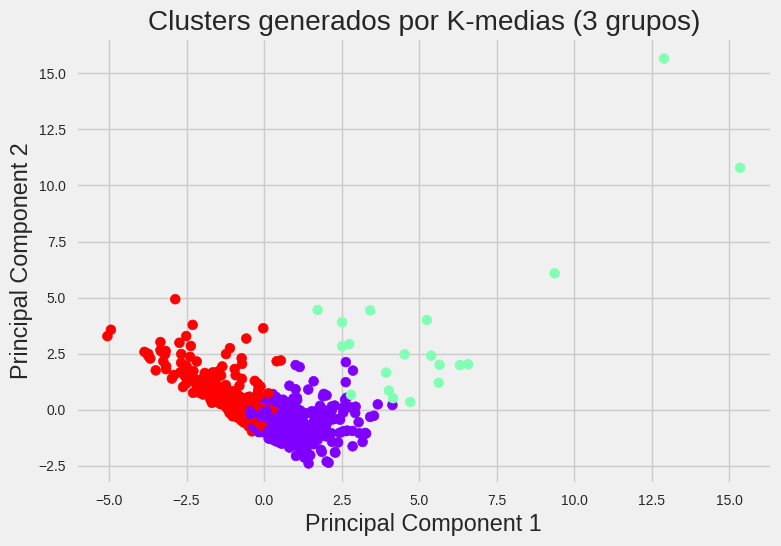

In [117]:
plt.scatter(df_PCA['PC1'], df_PCA['PC2'], c = k_means3_labels, cmap='rainbow')
plt.title('Clusters generados por K-medias (3 grupos)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

Visualmente este agrupamiento es más ameno a nuestro entendimiento; pero no debemos confiarnos. Esperemos los resultados de las métricas que siguen.

# Validación interna

La validación interna en clustering es un conjunto de técnicas y métricas utilizadas para evaluar la calidad y coherencia de los clusters generados sin depender de información externa adicional, como etiquetas. Estas técnicas son útiles para analizar y comparar la coherencia de los clusters dentro de un conjunto de datos.

## Davies-Bouldin Score

La puntuación en el "Davies-Bouldin Score" se define como la medida de similitud promedio de cada grupo con su grupo más similar, donde la similitud es la relación entre las distancias dentro del grupo y las distancias entre grupos. Por lo tanto, los grupos que están más alejados y menos dispersos darán como resultado una puntuación mejor.

La puntuación mínima es cero, y valores más bajos indican una agrupación mejor. (https://scikit-learn.org/stable/modules/generated/sklearn.metrics.davies_bouldin_score.html)

In [118]:
print(f"Davies Bouldin Score for k_means(6 groups): {davies_bouldin_score(df_PCA, k_means6_labels)}")
print(f"Davies Bouldin Score for Hierarchical clustering: {davies_bouldin_score(df_PCA, hierarchical_clus_labels)}")
print(f"Davies Bouldin Score for DBscan: {davies_bouldin_score(df_PCA, dbscan_labels)}")
print(f"Davies Bouldin Score for k_means(3 groups): {davies_bouldin_score(df_PCA, k_means3_labels)}")


Davies Bouldin Score for k_means(6 groups): 1.045447236101278
Davies Bouldin Score for Hierarchical clustering: 1.2021171545982308
Davies Bouldin Score for DBscan: 1.9909769660375836
Davies Bouldin Score for k_means(3 groups): 1.4114338354666103


El mejor puntaje ha sido el obtenido por el clustering de K-means de 6 grupos, seguido por el clustering jerárquico.

## Silhoutte Score

Al revés de la prueba anterior, en el test de Siluette un número cercano a 1 implica que los clústeres son muy cohesivos y están bien separados entre sí. Los valores negativos generalmente sugieren que un punto de datos ha sido asignado al clúster incorrecto. Los valores rondando el 0 sugieren que los clústeres se superponen, lo que podría indicar que el agrupamiento no es muy claro o que algunos puntos de datos pueden pertenecer a múltiples clústeres (datos tomados de https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html)

In [120]:
print(f"Silhoutte Score for k_means(6 groups): {silhouette_score(df_PCA, k_means6_labels)}")
print(f"Silhoutte Score for Hierarchical clustering: {silhouette_score(df_PCA, hierarchical_clus_labels)}")
print(f"Silhoutte Score for DBscan: {silhouette_score(df_PCA, dbscan_labels)}")
print(f"Silhoutte Score for k_means(3 groups): {silhouette_score(df_PCA, k_means3_labels)}")

Silhoutte Score for k_means(6 groups): 0.3120523801252814
Silhoutte Score for Hierarchical clustering: 0.2689313169794361
Silhoutte Score for DBscan: 0.39790894988294506
Silhoutte Score for k_means(3 groups): 0.2426206010810592


En la prueba de Silhouette el DBscan obtuvo el mejor puntaje. En segundo lugar el k-means de 6 grupo obtuvo un puntaje similar, aunque ninguno lo suficiente cercano a 1 como para indicarnos que los grupos se hayan claramente definidos.


Consideraremos entonces al cluster de k-means de 6 grupos como aquel obtuvo grupos mejor definidos. Visualizemos el grafico de Silhouette:

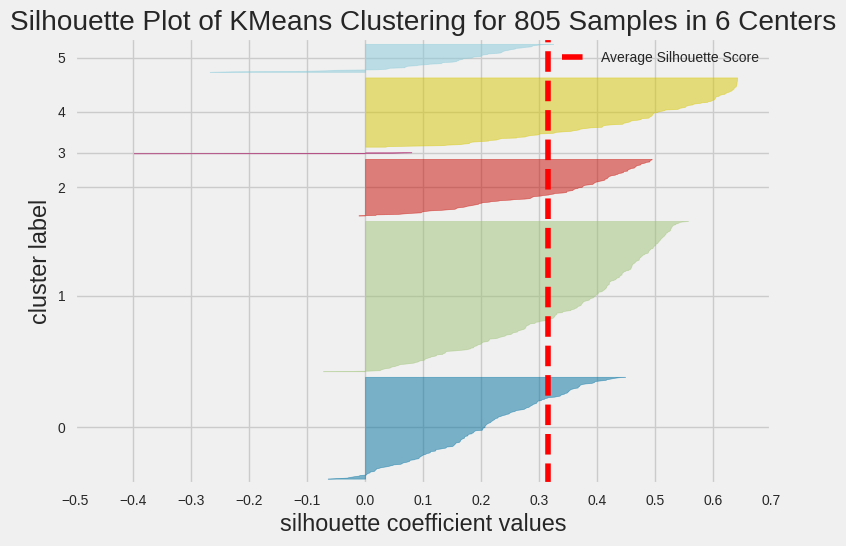

SilhouetteVisualizer(ax=<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 805 Samples in 6 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>,
                     colors='yellowbrick',
                     estimator=KMeans(n_clusters=6, n_init=10, random_state=42))

In [121]:
#Kmeans con k=6 (el que elegimos)
silhouette_visualizer(KMeans(6, n_init=10, random_state=42), df_PCA, colors='yellowbrick')

Mirando esta gráfica de Silhouette es valido preguntarse sino seria mejor probar con 5 o 4 grupos (el método del codo estaba entre 6 y 4). Como este es un análisis breve, lo dejaremos para otro momento.

# Validación externa

## Indice de Rand Ajustado (ARI)

Podemos comparar las etiquetas de nuestras variables originales con la agrupación que obtuvimos con el método de clustering.

El valor del ARI varía de -1 a 1, donde:

1 significa un acuerdo perfecto,

0 significa un acuerdo esperado por azar

y valores negativos indican un acuerdo peor que el esperado por azar.

Un valor positivo de ARI indica que el acuerdo entre los agrupamientos es mejor de lo esperado por azar.

Compararemos nuestro clusters con diversas variables del dataset a ver si encontramos alguna correspondencia:

In [122]:

def k_means6_ARI(column):
  labels_true = df_scaled[column]
  labels_pred = k_means6_labels
  return adjusted_rand_score(labels_true, labels_pred)

In [123]:

resultados = []

for col in df_scaled:
    ari_value = k_means6_ARI(col)
    resultados.append((col, ari_value))

#ordenamos los resultados de forma descendente
resultados_ordenados = sorted(resultados, key=lambda x: x[1], reverse=True)

for col, ari in resultados_ordenados:
    print(f'columna: {col}, ARI: {ari}')

columna: is_streamer, ARI: 0.11115066364284897
columna: fide, ARI: 0.06710830071580555
columna: highest_tactics_rating, ARI: 0.03777898059245158
columna: current_bullet_rating, ARI: 0.03434870194960398
columna: bullet_win, ARI: 0.033427179768446134
columna: rapid_win, ARI: 0.020904808987876763
columna: current_rapid_rating, ARI: 0.01911665376638477
columna: current_blitz_rating, ARI: 0.017474562292581357
columna: blitz_win, ARI: 0.016319927807374308
columna: followers, ARI: 0.00380188455501146


Los valores de ARI no son lo suficientemente altos como para poder colegir que los agrupamientos tienen un sentido claro.

# Biplot


En un biplot, las observaciones y las variables originales del conjunto de datos se representan simultáneamente en el mismo espacio gráfico. Aquí hay algunas características claves de un biplot:

Observaciones: Se representan como puntos en el gráfico, y la posición relativa de las observaciones refleja sus relaciones de similitud o diferencia en términos de las variables originales.

Variables originales: Se representan como vectores desde el origen del gráfico. La dirección y longitud de estos vectores indican la dirección e intensidad de la contribución de cada variable a la variabilidad total.

Distancias y Ángulos: La distancia entre puntos de observación refleja su similitud o diferencia, y los ángulos entre vectores indican la correlación entre las variables originales.

Interpretación: Un biplot facilita la interpretación visual de la estructura de los datos al mostrar tanto la información sobre las observaciones como las variables. Puede ayudar a identificar patrones, relaciones y tendencias en el conjunto de datos.

In [128]:
scalePC1 = 1.0/(df_PCA['PC1'].max() - df_PCA['PC1'].min())
scalePC2 = 1.0/(df_PCA['PC2'].max() - df_PCA['PC2'].min())
l = pca.components_
features = df_scaled.columns

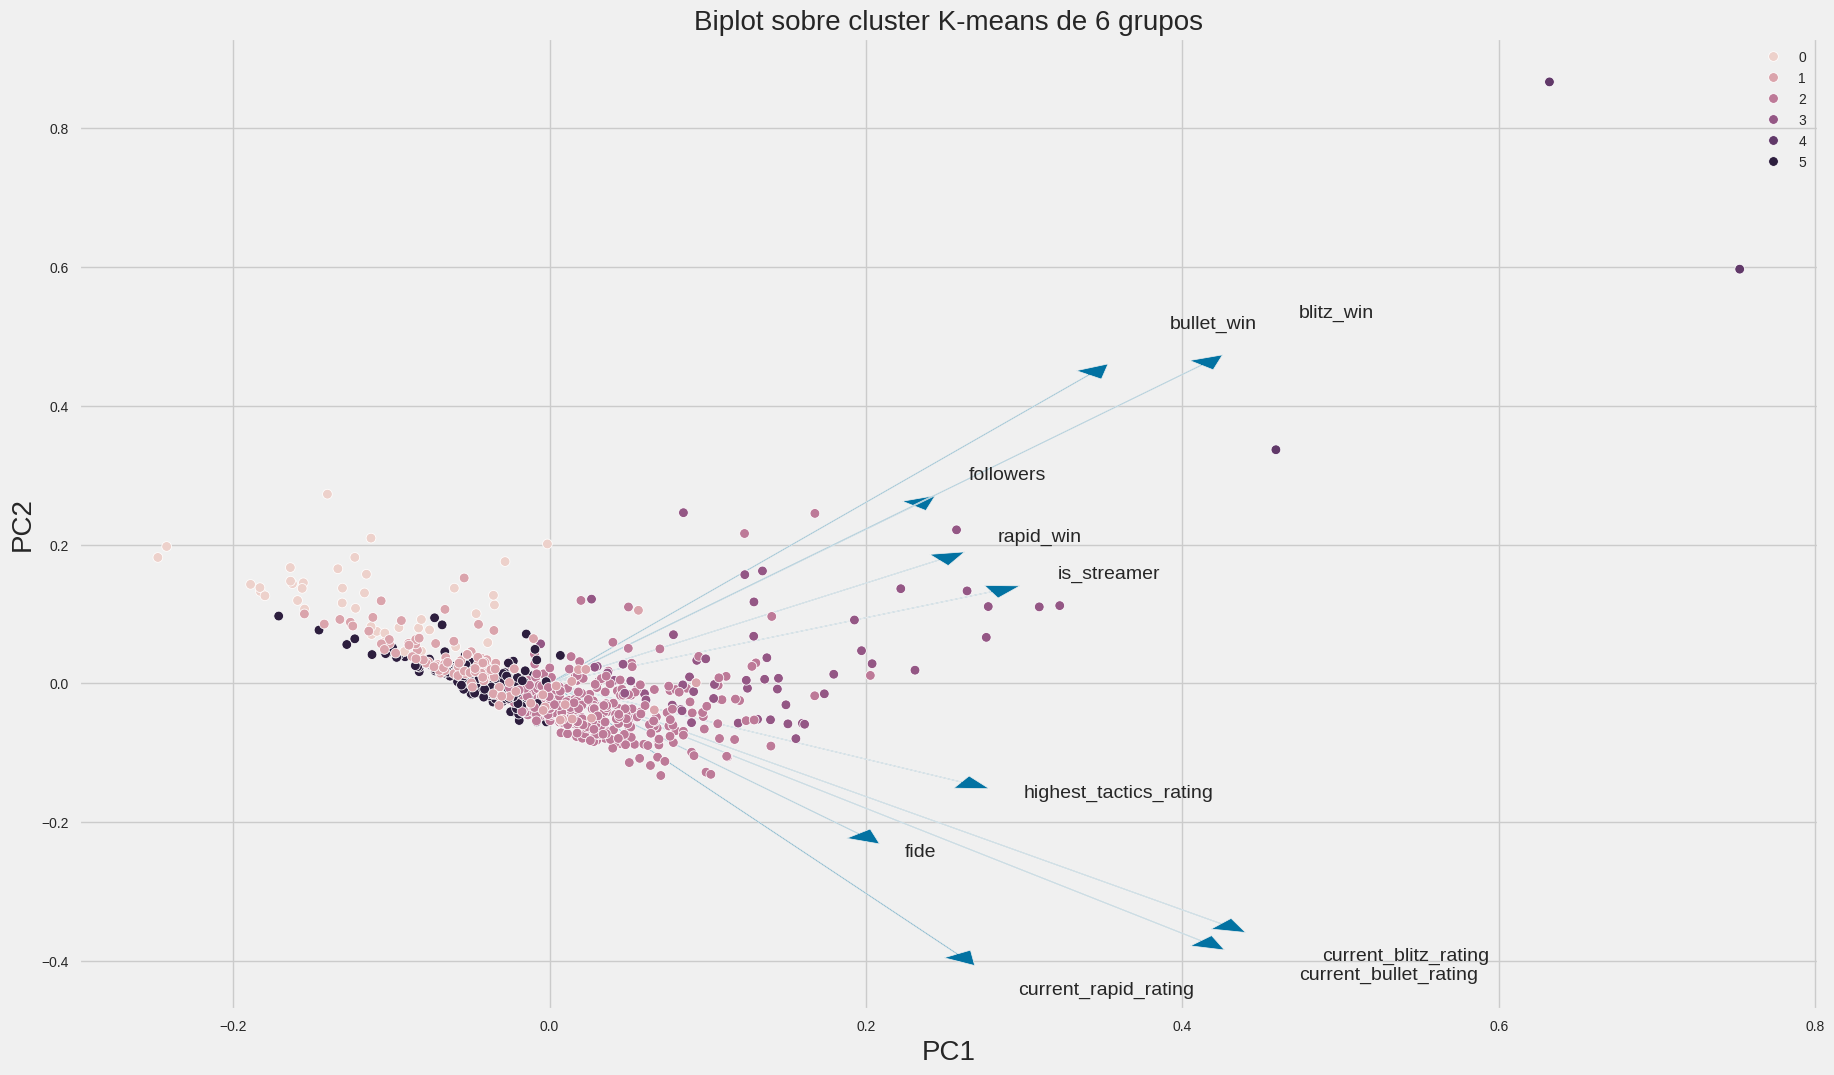

In [129]:

plt.figure(figsize=(20,12))

for i, features in enumerate(features):
    plt.arrow(0, 0, l[0, i],
             l[1, i],
              head_width=0.02,
             head_length=0.02)
    plt.text(l[0, i] * 1.15,
            l[1, i] * 1.15,
            features, fontsize=14)

sns.scatterplot(x=df_PCA['PC1'] * scalePC1,
                y=df_PCA['PC2'] * scalePC2,
                hue= k_means6_labels)

plt.xlabel('PC1', fontsize=20)
plt.ylabel('PC2', fontsize=20)
plt.title('Biplot sobre cluster K-means de 6 grupos', fontsize=20)
plt.show()

El biplot nos demuestra que las variables de ratings actuales estan bastante correlacionadas y que tienen al mismo tiempo un loading alto en la variabilidad total.
Lo mismo podemos decir de las variables "bullet win" y "blitz win".
Si bien, lo cierto es que no se evidencia con claridad ningun agrupamiento que se corresponda con las distintas variables, podemos apreciar que el grupo 0 se halla lejos de toda determinación de las variables: ninguno de los vectores/variables apunta hacia las proximidades de este grupo.

### Análisis estadísticos de los agrupamientos

Ahora podemos añadir nuestro k-means a nuestro dataset original e indagar en sus caracteristicas:

In [130]:
df1['k_means_6']= k_means6_labels

Observemos la variable de victorias bullets: ¿existe alguna lógica en los agrupamientos?

In [131]:
k_means_stats = df1.groupby('k_means_6')
k_means_stats['bullet_win'].describe()

,count,mean,std,min,25%,50%,75%,max
k_means_6,,,,,,,,
0,43.0,453.059253,787.663474,0.0,5.00,58.0,784.50000,3884.0
1,104.0,766.585874,1568.982824,1.0,18.00,333.5,1042.88697,12072.0
2,351.0,1030.798217,2349.071907,0.0,108.00,415.0,1042.88697,33569.0
3,56.0,2550.247982,4247.900258,0.0,209.25,625.5,2752.00000,18666.0
4,3.0,32968.333333,24237.509450,10920.0,19992.00,29064.0,43992.50000,58921.0
5,248.0,551.566415,538.459480,0.0,20.75,389.5,1042.88697,3189.0


In [132]:
k_means_stats['current_rapid_rating'].describe()

,count,mean,std,min,25%,50%,75%,max
k_means_6,,,,,,,,
0,43.0,1667.372093,558.583499,263.0,1353.00,1768.0,2115.00,2390.0
1,104.0,2392.163462,190.517288,1319.0,2375.50,2390.0,2470.25,2780.0
2,351.0,2447.612536,196.944991,1493.0,2390.00,2467.0,2571.00,2948.0
3,56.0,2507.535714,266.916600,941.0,2434.75,2548.0,2662.50,2778.0
4,3.0,2578.000000,192.533114,2398.0,2476.50,2555.0,2668.00,2781.0
5,248.0,2404.955645,135.100210,1954.0,2381.75,2390.0,2457.25,2940.0


In [133]:
k_means_stats['current_bullet_rating'].describe()

,count,mean,std,min,25%,50%,75%,max
k_means_6,,,,,,,,
0,43.0,2085.784491,414.048990,1079.0,1799.500000,2165.000000,2398.000000,2759.0
1,104.0,2596.957674,219.395365,1791.0,2495.000000,2648.433281,2650.000000,3090.0
2,351.0,2766.669037,166.792611,2310.0,2648.433281,2760.000000,2870.500000,3264.0
3,56.0,2811.025594,245.043592,1905.0,2645.324961,2838.500000,2971.750000,3262.0
4,3.0,3006.333333,504.283981,2425.0,2846.500000,3268.000000,3297.000000,3326.0
5,248.0,2559.190301,174.674756,1746.0,2504.750000,2648.433281,2648.433281,2871.0


In [134]:
k_means_stats['highest_tactics_rating'].describe()

,count,mean,std,min,25%,50%,75%,max
k_means_6,,,,,,,,
0,43.0,2545.906977,965.172124,400.0,2223.50,2774.0,3319.0,3860.0
1,104.0,2086.711538,1075.717459,400.0,1200.00,2358.0,2947.0,4821.0
2,351.0,3272.678063,633.541828,400.0,2959.00,3292.0,3614.5,6779.0
3,56.0,3267.839286,762.367122,800.0,2897.25,3434.0,3717.5,5377.0
4,3.0,3273.333333,334.144180,2890.0,3158.50,3427.0,3465.0,3503.0
5,248.0,1673.068548,1101.260893,400.0,400.00,1339.5,2723.0,4015.0


El grupo 3 y 4 son los grupos que contienen a los jugadores con mejores ratings. El grupo 4, compuesto por 3 observaciones, podrian ser outliers (¿aquellos jugadores como Carlsen, Nakamura y los bots de la plataforma?); el grupo 3 podria ser el de los top 50. Sin embargo, este fue un agrupamiento de prueba y ahora realizaremos un segundo experimento.

# ZONA CLUSTERING 2

En este caso la reducción de dimensionalidad la haremos a mano, revisando aquellas columnas que consideremos tautológicas

## preprocesamiento de datos:

In [135]:
df_2 = df1.copy()

### Eliminando columnas redundantes o innecesarias

algunas columnas tienen un solo valor por lo tanto no nos interesan:

In [137]:
df_2['title'].value_counts()

GM    805
Name: title, dtype: int64

In [138]:
df_2 = df_2.drop(columns='title')

Pudimos ver en análisis hechos anteriormente el alto grado de correlación en la mayoria de las columnas relacionadas con los puntajes en los distintos tipos de partidas (rapidas, blitz y bullets).
Por lo tanto, conservaremos algunas columnas que consideramos representativas y desecharemos el resto:

In [139]:
columns_to_drop = ['highest_rapid_rating', 'highest_rapid_date', 'rapid_draw', 'rapid_loss',
                   'highest_blitz_rating', 'highest_blitz_date', 'blitz_draw', 'blitz_loss',
                   'highest_bullet_rating', 'highest_bullet_date', 'bullet_draw', 'bullet_loss', 'highest_tactics_date']

df_2 = df_2.drop(columns=columns_to_drop)


### Codificación de datos categóricos

In [140]:
df_2 = pd.get_dummies(df_2, columns=["country"], prefix=["country"])

En la columna ['status'] tenemos una variable catégorica ordinal, es decir, que los valores pueden ordenarse de menor a mayor:

In [141]:
df_2['status'].unique()

array(['premium', 'staff', 'basic'], dtype=object)

In [142]:
df_2['status'] = df_2['status'].map({'basic': 0, 'staff': 1, 'premium': 2})

en este caso tb tenemos una variable binaria:

In [143]:
df_2['is_streamer'].unique()

array([False,  True])

In [144]:
df_2['is_streamer'] = df_2['is_streamer'].replace(['False','True'],[0,1]).astype('int')

## Feature Engineering

Comenzemos por las variables de fechas. La fecha
más reciente de la columna ['last online'] es el 16 de julio de 2023. Tomaremos esa fecha como límite para contabilizar la cantidad de días desde que se unió a la plataforma de ajedrez.

In [145]:
df_2['joined'] = df_2['joined'].astype('datetime64')
df_2['last_online'] = df_2['last_online'].astype('datetime64')


In [146]:
df_2['last_online'].describe()

count                     805
unique                    225
top       2023-07-16 00:00:00
freq                      230
first     2009-12-08 00:00:00
last      2023-12-07 00:00:00
Name: last_online, dtype: object

In [147]:
df_2['days_in_platform'] = pd.to_datetime('16/07/2023') - df_2['joined']
df_2['days_in_platform']

0     2927 days
1     2076 days
2     3353 days
3     4706 days
4     3773 days
         ...   
907   1719 days
908   3199 days
909   2267 days
910    772 days
911   1649 days
Name: days_in_platform, Length: 805, dtype: timedelta64[ns]

In [148]:
#transformamos la columna en númerica discreta:
df_2['days_in_platform'] = df_2['days_in_platform'].dt.days.astype(int)

In [149]:
df_2['days_in_platform'].describe()

count     805.000000
mean     2914.021118
std      1138.882787
min      -108.000000
25%      2157.000000
50%      2887.000000
75%      3736.000000
max      5842.000000
Name: days_in_platform, dtype: float64

### Histograma de "Days in platform"

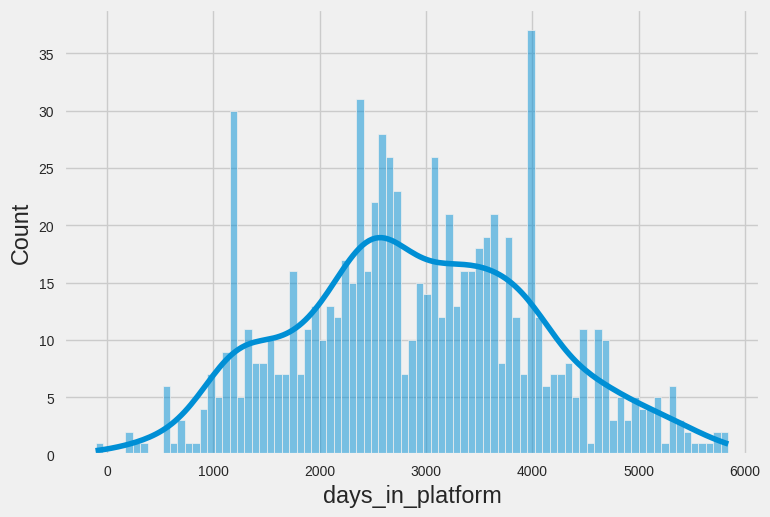

In [151]:
sns.histplot(df_2['days_in_platform'], binwidth=70, kde=True)
plt.show()

### Diez jugadores con mayor tiempo en la plataforma:

In [154]:
days_in_platform = df_2.sort_values(by='days_in_platform', ascending=False).reset_index()
days_in_platform[['username', 'name','days_in_platform']].head(10)

,username,name,days_in_platform
0,misapap,Misa Pap,5842
1,vovkcoach,Yuri Vovk,5813
2,nigeld,Nigel Davies,5714
3,gmarunchess,Arunprasad Subramanian,5714
4,gilmil,Gilberto Milos,5670
5,gmg,Andrey Gorovets,5588
6,thalaiva,Ramesh RB,5498
7,keene,Raymond Keene,5484
8,rakhmanov_aleksandr,Aleksandr Rakhmanov,5458
9,gmvallejo,Francisco Vallejo Pons,5379


## Estandarización de datos numéricos

Ya hemos usado las columnas ['joined'] y ['last_online'] para crear una nueva variable. Nos desharemos de ellas de ahora en más:

In [155]:
df_2 = df_2.drop(columns=['joined','last_online'])

guardamos la columna ['username']

In [156]:
username = df_2['username']

In [157]:
df_2 = df_2.drop(['username','name'], axis=1)

In [158]:
from sklearn.preprocessing import StandardScaler

#Aplicamos la estandarizacion a las variables de interes
scaler_2 = StandardScaler()
scaler_2 = scaler.fit_transform(df_2)

In [159]:
scaler_2 = pd.DataFrame(scaler_2, columns=df_2.columns)
scaler_2

,fide,followers,current_rapid_rating,rapid_win,current_blitz_rating,blitz_win,current_bullet_rating,bullet_win,highest_tactics_rating,is_streamer,...,country_Turkmenistan,country_Ukraine,country_United Arab Emirates,country_United Kingdom,country_United States,country_Uruguay,country_Uzbekistan,country_Vietnam,country_Zimbabwe,days_in_platform
0,1.346470,-0.046658,-0.001013,-1.027740e-16,-2.034009e-15,0.000000,0.000000,0.000000,-1.909752,-0.265478,...,-0.035267,-0.206751,-0.061161,-0.112154,2.106938,-0.049907,-0.079057,-0.079057,-0.035267,0.011403
1,0.835114,-0.049897,-0.025942,-3.758798e-01,5.608174e-01,-0.222796,0.047698,-0.326480,0.579249,-0.265478,...,-0.035267,-0.206751,-0.061161,-0.112154,-0.474622,-0.049907,-0.079057,-0.079057,-0.035267,-0.736285
2,0.759686,-0.053788,-0.001013,-1.027740e-16,-2.034009e-15,0.000000,0.000000,0.000000,-1.909752,-0.265478,...,-0.035267,-0.206751,-0.061161,-0.112154,-0.474622,-0.049907,-0.079057,-0.079057,-0.035267,0.385687
3,0.759686,3.385304,1.904238,7.250891e-02,2.636212e+00,-0.063954,2.279506,-0.123013,-1.909752,-0.265478,...,-0.035267,-0.206751,-0.061161,-0.112154,-0.474622,-0.049907,-0.079057,-0.079057,-0.035267,1.574432
4,0.707552,0.290549,1.437719,1.215177e+00,1.911613e+00,-0.209372,1.448271,-0.106542,0.813220,-0.265478,...,-0.035267,-0.206751,-0.061161,-0.112154,2.106938,-0.049907,-0.079057,-0.079057,-0.035267,0.754698
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
800,-2.437121,-0.058502,-0.001013,-1.027740e-16,-4.634614e-01,-0.581494,0.000000,0.000000,-1.211330,-0.265478,...,-0.035267,-0.206751,-0.061161,-0.112154,-0.474622,-0.049907,-0.079057,-0.079057,-0.035267,-1.049945
801,-2.437121,-0.058236,-0.382063,-4.337364e-01,-8.928534e-01,-0.526310,-0.373613,-0.334554,-1.909752,-0.265478,...,-0.035267,-0.206751,-0.061161,-0.112154,-0.474622,-0.049907,-0.079057,-0.079057,-0.035267,0.250382
802,-2.437121,-0.058187,0.283884,-5.060571e-01,-4.634614e-01,-0.576274,0.000000,0.000000,0.773934,-0.265478,...,-0.035267,-0.206751,-0.061161,-0.112154,2.106938,-0.049907,-0.079057,-0.079057,-0.035267,-0.568472
803,-2.437121,-0.057849,-0.001013,-1.027740e-16,9.991551e-01,-0.544580,0.000000,0.000000,-1.909752,-0.265478,...,-0.035267,-0.206751,-0.061161,-0.112154,-0.474622,-0.049907,-0.079057,-0.079057,-0.035267,-1.881978


## Detección de datos atípicos(outliers)

scikit-learn nos ofrece una gran variedad de estrategias para detectar outliers. Un resumen de las opciones disponibles puede encontrarse aqui

En esta oportunidad vamos a utilizar un método que se llama Local Outlier Factor (LOF). La idea detrás de este método es sencilla: va a considerar outlier a cualquier punto que esté muy alejado de todos los demás, en otras palabras, un punto que tenga una muy baja densidad de datos cerca.

In [160]:
from sklearn.neighbors import LocalOutlierFactor

.fit_predict() va a devolver para cada una de mis filas si el método la predijo como un outlier (-1) o no (1).

In [161]:
lof_outlier = LocalOutlierFactor(n_neighbors=5)
outlier_scores = lof_outlier.fit_predict(scaler_2)

In [162]:
#Cantidad de outliers detectados
sum(outlier_scores == -1)

222

In [163]:
#Elimino los outliers de mis datos
mask = outlier_scores != -1
scaler_2 = scaler_2.loc[mask,:]

# EDA 2

Realizaremos una segunda exploración de datos, ahora que hemos realizado la extracción de datos atípicos:

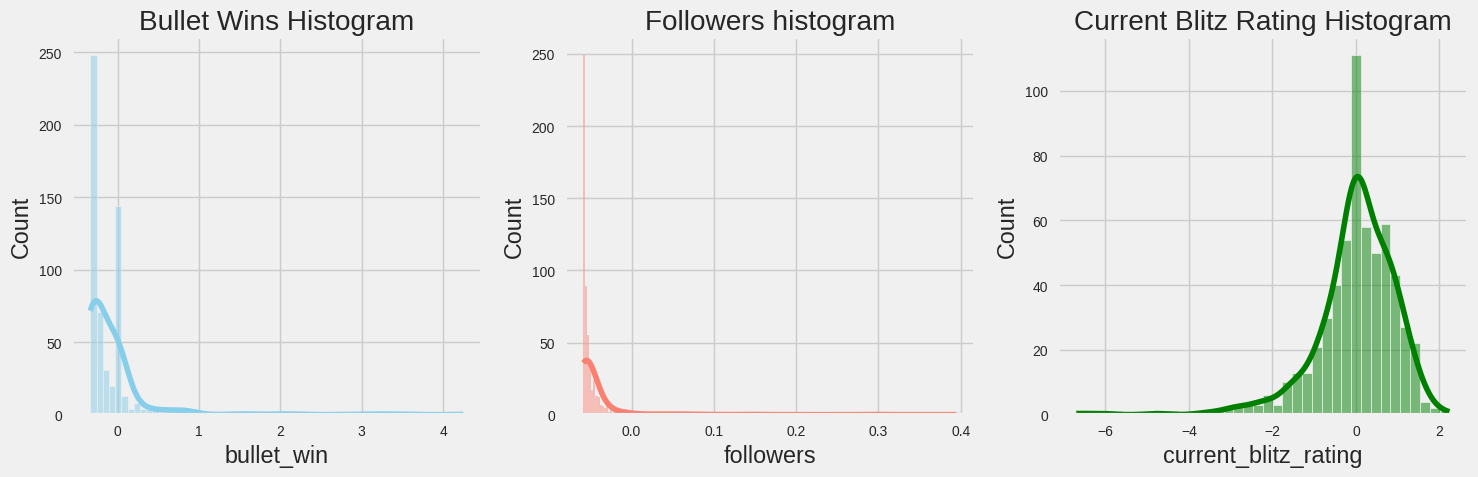

In [164]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Plot 1
sns.histplot(scaler_2['bullet_win'], kde=True, ax=axes[0], color='skyblue')
axes[0].set_title('Bullet Wins Histogram')

# plot 2
sns.histplot(scaler_2['followers'], kde=True, ax=axes[1], color='salmon')
axes[1].set_title('Followers histogram')


# plot 3
sns.histplot(scaler_2['current_blitz_rating'], kde=True, ax=axes[2], color='green')
axes[2].set_title('Current Blitz Rating Histogram')

# Ajustar el diseño
plt.tight_layout()
plt.show()

Veamos como quedan nuestros agrupamientos del Clustering 1. Ahora que no hay outliers es posible que más de un grupo haya desaparecido:

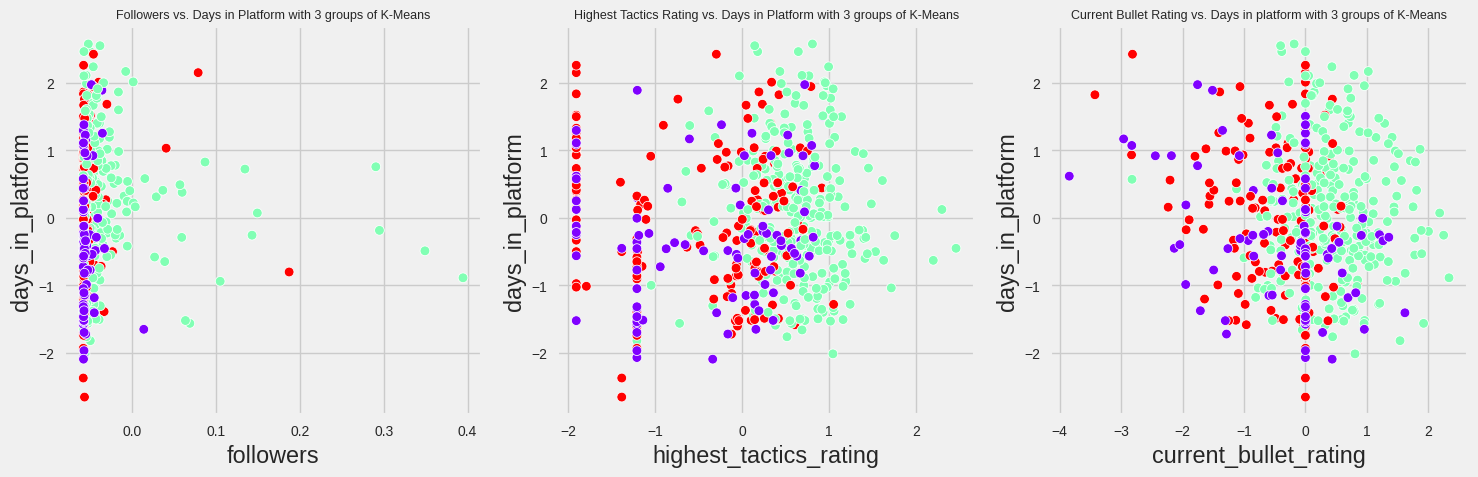

In [172]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Plot 1
sns.scatterplot(scaler_2, x='followers', y='days_in_platform', hue='k_means_6', legend=False, ax=axes[0], palette='rainbow')
axes[0].set_title('Followers vs. Days in Platform with 6 groups of K-Means', fontsize = 9)

# plot 2
sns.scatterplot(scaler_2, x='highest_tactics_rating', y='days_in_platform', hue='k_means_6', legend=False, ax=axes[1], palette='rainbow')
axes[1].set_title('Highest Tactics Rating vs. Days in Platform with 6 groups of K-Means', fontsize = 9)


# plot 3
sns.scatterplot(scaler_2, x='current_bullet_rating', y='days_in_platform', hue='k_means_6', legend=False, ax=axes[2], palette='rainbow')
axes[2].set_title('Current Bullet Rating vs. Days in platform with 6 groups of K-Means', fontsize = 9)

# Ajustar el diseño
plt.tight_layout()
plt.show()

Observamos que a partir de eliminar una gran cantidad de datos atípicos, nos encontramos con aquello que suponiamos de antemano. A saber: que más de un grupo de k-medias estaba constituido en su gran mayoría por este tipo de datos.


# Clustering

Realizaremos entonces un segundo experimento de clustering ahora sobre esta nueva versión de nuestro dataset:





## Cluster jerarquico

Directamente con el método Ward

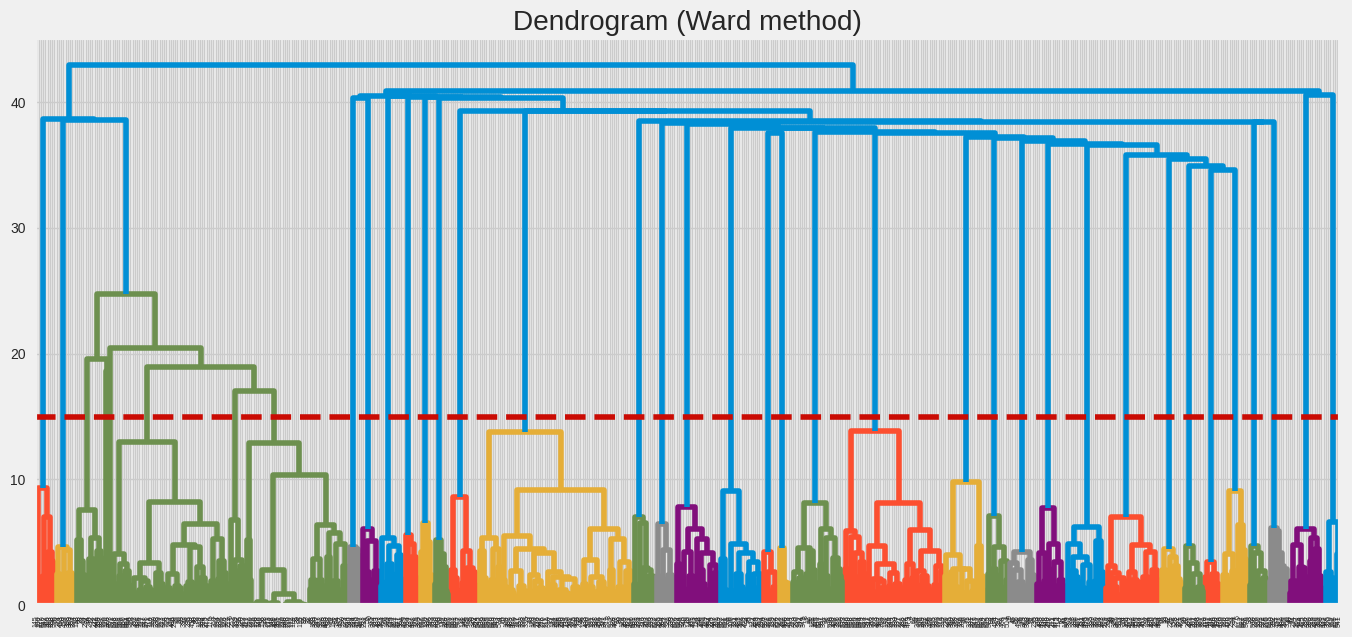

In [173]:
#Ward linkage
plt.figure(figsize=(15, 7))
plt.title("Dendrogram (Ward method)")

clusters = shc.linkage(scaler_2,
            method='ward',
            metric="euclidean")
shc.dendrogram(Z=clusters)
plt.axhline(y = 15, color = 'r', linestyle = '--')
plt.show()

Tomaremos 2 agrupamientos posibles:

In [174]:
clustering_model = AgglomerativeClustering(n_clusters=2, metric='euclidean', linkage='ward')
clustering_model.fit(scaler_2)

clustering_model.labels_

array([0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,

creamos un df con los resultados:

In [175]:
finalDf = scaler_2.copy()
finalDf['hclust'] = clustering_model.labels_

## K-means

In [176]:

#realizamos una iteración para obtener el mejor k:
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}

# SSE: Sum of Square Error
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaler_2)
    sse.append(kmeans.inertia_)

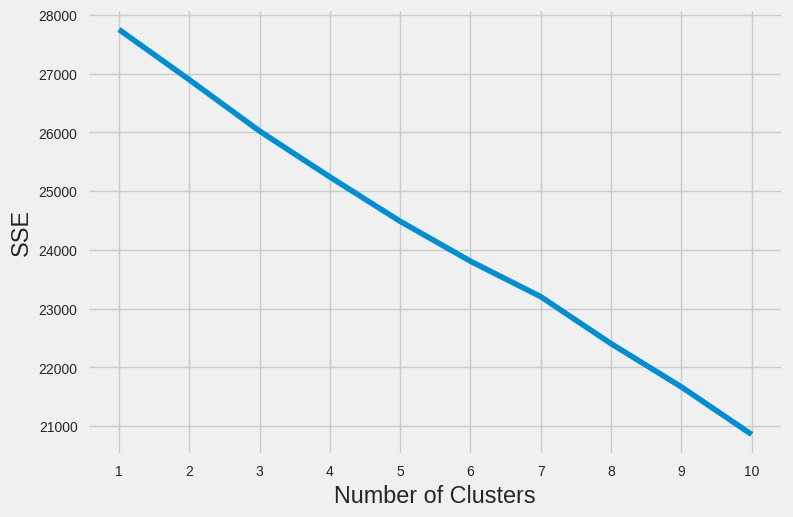

In [177]:

plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [178]:

kl = KneeLocator(
    range(1, 11), sse, curve="convex", direction="decreasing"
)

kl.elbow

4

El método del codo nos impone 4 grupos pero lo cierto es que la gráfica no es clara en ese sentido. Probemos entonces K-means con 3 y 4 agrupamientos.

### K-means 4

In [179]:

kmeans = KMeans(
    init="random",
    n_clusters=4,
    n_init=10,
    max_iter=300,
    random_state=42
)


In [180]:

kmeans.fit(scaler_2)

KMeans(init='random', n_clusters=4, n_init=10, random_state=42)

In [181]:
finalDf['kmeans_4'] = kmeans.labels_

### K-means 3

Ahora con 3 grupos:

In [185]:
kmeans = KMeans(
    init="random",
    n_clusters=3,
    n_init=10,
    max_iter=300,
    random_state=42
)
kmeans.fit(scaler_2)

KMeans(init='random', n_clusters=3, n_init=10, random_state=42)

In [186]:
finalDf['kmeans_3'] = kmeans.labels_

### Comparación de agrupamientos

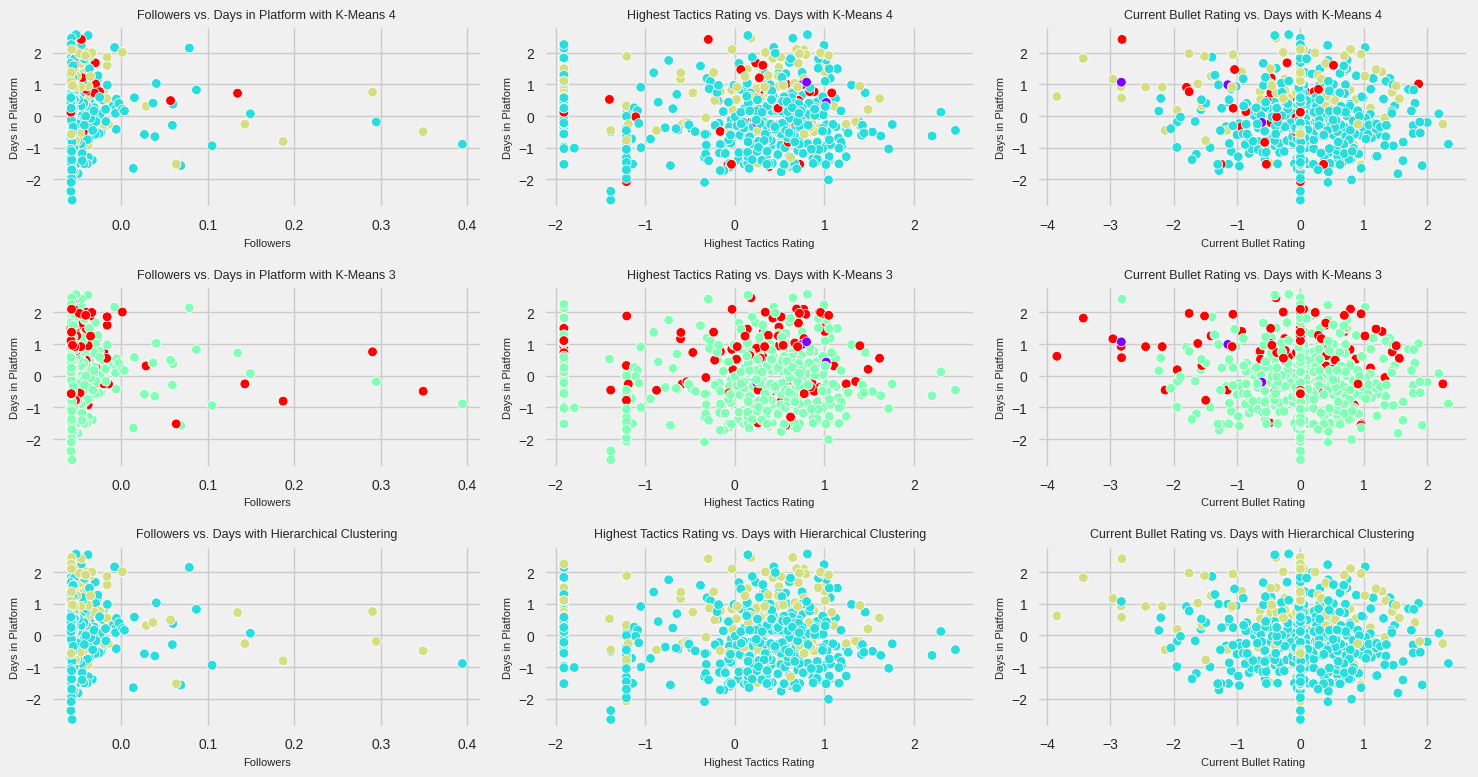

In [188]:

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 8))

# Plot 1
sns.scatterplot(data=finalDf, x='followers', y='days_in_platform', hue='kmeans_4', legend=False, ax=axes[0, 0], palette='rainbow')
axes[0, 0].set_title('Followers vs. Days in Platform with K-Means 4', fontsize=9)
axes[0, 0].set_xlabel('Followers', fontsize=8)
axes[0, 0].set_ylabel('Days in Platform', fontsize=8)

# Plot 2
sns.scatterplot(data=finalDf, x='highest_tactics_rating', y='days_in_platform', hue='kmeans_4', legend=False, ax=axes[0, 1],palette='rainbow')
axes[0, 1].set_title('Highest Tactics Rating vs. Days with K-Means 4', fontsize=9)
axes[0, 1].set_xlabel('Highest Tactics Rating', fontsize=8)
axes[0, 1].set_ylabel('Days in Platform', fontsize=8)

# Plot 3
sns.scatterplot(data=finalDf, x='current_bullet_rating', y='days_in_platform', hue='kmeans_4', legend=False, ax=axes[0, 2], palette='rainbow')
axes[0, 2].set_title('Current Bullet Rating vs. Days with K-Means 4', fontsize=9)
axes[0, 2].set_xlabel('Current Bullet Rating', fontsize=8)
axes[0, 2].set_ylabel('Days in Platform', fontsize=8)

# Plot 4
sns.scatterplot(data=finalDf, x='followers', y='days_in_platform', hue='kmeans_3', legend=False, ax=axes[1, 0], palette='rainbow')
axes[1, 0].set_title('Followers vs. Days in Platform with K-Means 3', fontsize=9)
axes[1, 0].set_xlabel('Followers', fontsize=8)
axes[1, 0].set_ylabel('Days in Platform', fontsize=8)

# Plot 5
sns.scatterplot(data=finalDf, x='highest_tactics_rating', y='days_in_platform', hue='kmeans_3', legend=False, ax=axes[1, 1],palette='rainbow')
axes[1, 1].set_title('Highest Tactics Rating vs. Days with K-Means 3', fontsize=9)
axes[1, 1].set_xlabel('Highest Tactics Rating', fontsize=8)
axes[1, 1].set_ylabel('Days in Platform', fontsize=8)

# Plot 6
sns.scatterplot(data=finalDf, x='current_bullet_rating', y='days_in_platform', hue='kmeans_3', legend=False, ax=axes[1, 2], palette='rainbow')
axes[1, 2].set_title('Current Bullet Rating vs. Days with K-Means 3', fontsize=9)
axes[1, 2].set_xlabel('Current Bullet Rating', fontsize=8)
axes[1, 2].set_ylabel('Days in Platform', fontsize=8)

# Plot 7
sns.scatterplot(data=finalDf, x='followers', y='days_in_platform', hue='hclust', legend=False, ax=axes[2, 0], palette='rainbow')
axes[2, 0].set_title('Followers vs. Days with Hierarchical Clustering', fontsize=9)
axes[2, 0].set_xlabel('Followers', fontsize=8)
axes[2, 0].set_ylabel('Days in Platform', fontsize=8)

# Plot 8
sns.scatterplot(data=finalDf, x='highest_tactics_rating', y='days_in_platform', hue='hclust', legend=False, ax=axes[2, 1], palette='rainbow')
axes[2, 1].set_title('Highest Tactics Rating vs. Days with Hierarchical Clustering', fontsize=9)
axes[2, 1].set_xlabel('Highest Tactics Rating', fontsize=8)
axes[2, 1].set_ylabel('Days in Platform', fontsize=8)

# Plot 9
sns.scatterplot(data=finalDf, x='current_bullet_rating', y='days_in_platform', hue='hclust', legend=False, ax=axes[2, 2], palette='rainbow')
axes[2, 2].set_title('Current Bullet Rating vs. Days with Hierarchical Clustering', fontsize=9)
axes[2, 2].set_xlabel('Current Bullet Rating', fontsize=8)
axes[2, 2].set_ylabel('Days in Platform', fontsize=8)

# Ajustar el diseño
plt.tight_layout()
plt.show()


## Validación interna y externa

In [194]:
print(f"Davies Bouldin Score for k_means(4 groups): {davies_bouldin_score(finalDf,  finalDf['kmeans_4'])}")
print(f"Davies Bouldin Score for Hierarchical clustering: {davies_bouldin_score(finalDf, finalDf['hclust'])}")
print(f"Davies Bouldin Score for k_means(3 groups): {davies_bouldin_score(finalDf,  finalDf['kmeans_3'])}")

Davies Bouldin Score for k_means(4 groups): 2.2251026253768145
Davies Bouldin Score for Hierarchical clustering: 3.284677565677572
Davies Bouldin Score for k_means(3 groups): 2.1769538859822157


In [195]:
print(f"Silhoutte Score for k_means(4 groups): {silhouette_score(finalDf, finalDf['kmeans_4'])}")
print(f"Silhoutte Score for Hierarchical clustering: {silhouette_score(finalDf, finalDf['hclust'])}")
print(f"Silhoutte Score for k_means(3 groups): {silhouette_score(finalDf, finalDf['kmeans_3'] )}")

Silhoutte Score for k_means(4 groups): 0.00890196037118822
Silhoutte Score for Hierarchical clustering: 0.017415683452709517
Silhoutte Score for k_means(3 groups): -0.00830271008812365


A partir de los valores obtenidos podemos apreciar que la segmentación realizada no es adecuada.